pip install optuna (in terminal)

In [1]:
import optuna
import sklearn
import numpy as np
import matplotlib.pyplot as plt


Define the objective function 

In [88]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return np.sin(x**2) + 3*y
    
def objective(trial):
    noise = 5*(np.random.rand(1) - 0.5)
    x = trial.suggest_float("x", xmin, xmax)
    y = trial.suggest_float("y", ymin, ymax)
    return -(func(x,y) + noise) #Optuna finds the minimum so add a negative to the function to find the maximum 

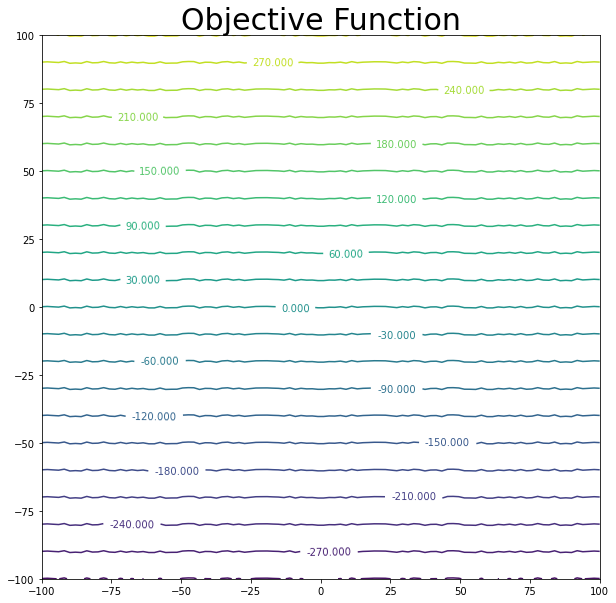

In [89]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()
        

### Pick a type of sampler 
Tree-structured Parzen Estimator algorithm implemented in optuna.samplers.TPESampler

CMA-ES based algorithm implemented in optuna.samplers.CmaEsSampler

Grid Search implemented in optuna.samplers.GridSampler

Random Search implemented in optuna.samplers.RandomSampler

In [90]:
study = optuna.create_study()
study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=50)

[I 2021-02-17 00:56:33,955] A new study created in memory with name: no-name-0309b217-57e7-42cb-becb-0f8c4a129a11
[I 2021-02-17 00:56:33,961] A new study created in memory with name: no-name-549dd162-51f8-4838-9017-e98daac8740a
[I 2021-02-17 00:56:33,968] Trial 0 finished with value: -167.0368229781826 and parameters: {'x': 9.391727848903614, 'y': 56.33802873853318}. Best is trial 0 with value: -167.0368229781826.
[I 2021-02-17 00:56:33,971] Trial 1 finished with value: 67.55426615092901 and parameters: {'x': 18.211136727972814, 'y': -22.412055620138034}. Best is trial 0 with value: -167.0368229781826.
[I 2021-02-17 00:56:33,974] Trial 2 finished with value: -189.7358954098054 and parameters: {'x': -63.086190046454995, 'y': 62.48834422908993}. Best is trial 2 with value: -189.7358954098054.
[I 2021-02-17 00:56:33,977] Trial 3 finished with value: -62.41838954809586 and parameters: {'x': 44.97426583116706, 'y': 20.75742451794902}. Best is trial 2 with value: -189.7358954098054.
[I 2021-

[I 2021-02-17 00:56:34,174] Trial 39 finished with value: 90.28205532178394 and parameters: {'x': 86.12814072240019, 'y': -29.05315994726709}. Best is trial 6 with value: -285.3194289745843.
[I 2021-02-17 00:56:34,177] Trial 40 finished with value: 133.02125503648972 and parameters: {'x': 17.538380967543503, 'y': -44.743392764854505}. Best is trial 6 with value: -285.3194289745843.
[I 2021-02-17 00:56:34,183] Trial 41 finished with value: -173.30109580157014 and parameters: {'x': -81.73494628853881, 'y': 57.22778451297316}. Best is trial 6 with value: -285.3194289745843.
[I 2021-02-17 00:56:34,199] Trial 42 finished with value: -1.3246603707642715 and parameters: {'x': -7.938632774265159, 'y': -0.012002263046866801}. Best is trial 6 with value: -285.3194289745843.
[I 2021-02-17 00:56:34,219] Trial 43 finished with value: 42.3204110511634 and parameters: {'x': 87.96926114507292, 'y': -13.534869597177405}. Best is trial 6 with value: -285.3194289745843.
[I 2021-02-17 00:56:34,225] Trial 

### Extract the Best Parameters

In [93]:
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: 44.64992324277077, f: 286.59520651322214
Found y: 95.21093678157771, f: 286.59520651322214


In [94]:
print(f"Sampler is {study.sampler.__class__.__name__}")

Sampler is RandomSampler


## Monte Carlo Simulation to Test the Performance of the Optimizer

This will measure the performance of the optimizer on a specific function. The number of trials and the number of iterations can be varied. 

In [95]:
x = []
y = []
z = []
for i in range(100):    
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
    study.optimize(objective, n_trials=50)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y))
    if i%10 == 0:
        print(i)
    else:
        pass
    

[I 2021-02-17 00:56:49,932] A new study created in memory with name: no-name-a356ec99-11c0-4049-a8c3-dbe17367fabc
[I 2021-02-17 00:56:49,940] A new study created in memory with name: no-name-ce71e8de-0deb-451f-9837-29054f015c2b
[I 2021-02-17 00:56:49,943] Trial 0 finished with value: 125.00516615139881 and parameters: {'x': 95.73618250426995, 'y': -40.90508642163218}. Best is trial 0 with value: 125.00516615139881.
[I 2021-02-17 00:56:49,946] Trial 1 finished with value: -212.85165147709168 and parameters: {'x': -85.20967211216006, 'y': 71.72730668977562}. Best is trial 1 with value: -212.85165147709168.
[I 2021-02-17 00:56:49,949] Trial 2 finished with value: 200.25239839368754 and parameters: {'x': -3.2077776151835167, 'y': -67.22067996245607}. Best is trial 1 with value: -212.85165147709168.
[I 2021-02-17 00:56:49,952] Trial 3 finished with value: 113.20765127023108 and parameters: {'x': 39.97909440850128, 'y': -38.34953818823665}. Best is trial 1 with value: -212.85165147709168.
[I

[I 2021-02-17 00:56:50,082] Trial 39 finished with value: -49.04564984939896 and parameters: {'x': -48.68397627145682, 'y': 15.761104794783705}. Best is trial 7 with value: -266.7310385830249.
[I 2021-02-17 00:56:50,089] Trial 40 finished with value: 93.05745687839003 and parameters: {'x': -19.440702374102514, 'y': -30.591955977376557}. Best is trial 7 with value: -266.7310385830249.
[I 2021-02-17 00:56:50,096] Trial 41 finished with value: 35.97324237854037 and parameters: {'x': -86.43231291332742, 'y': -12.75797125918028}. Best is trial 7 with value: -266.7310385830249.
[I 2021-02-17 00:56:50,099] Trial 42 finished with value: 105.7494554040587 and parameters: {'x': 54.23198335784127, 'y': -35.65089696468375}. Best is trial 7 with value: -266.7310385830249.
[I 2021-02-17 00:56:50,104] Trial 43 finished with value: 65.26787225629728 and parameters: {'x': 88.2423869904151, 'y': -21.686603812804535}. Best is trial 7 with value: -266.7310385830249.
[I 2021-02-17 00:56:50,106] Trial 44 fi

[I 2021-02-17 00:56:50,237] Trial 28 finished with value: 134.40100346588167 and parameters: {'x': -4.020146702748434, 'y': -45.0397415036051}. Best is trial 4 with value: -294.3589507033041.
[I 2021-02-17 00:56:50,240] Trial 29 finished with value: 206.15252393090532 and parameters: {'x': -97.71799148118244, 'y': -69.1440231837747}. Best is trial 4 with value: -294.3589507033041.
[I 2021-02-17 00:56:50,247] Trial 30 finished with value: -57.59094887603434 and parameters: {'x': 80.83865420263808, 'y': 18.393187484453293}. Best is trial 4 with value: -294.3589507033041.
[I 2021-02-17 00:56:50,251] Trial 31 finished with value: 88.6754966865343 and parameters: {'x': 87.09782522398021, 'y': -30.12857141764313}. Best is trial 4 with value: -294.3589507033041.
[I 2021-02-17 00:56:50,253] Trial 32 finished with value: 89.58929534373394 and parameters: {'x': -28.141359426711915, 'y': -30.464297434853165}. Best is trial 4 with value: -294.3589507033041.
[I 2021-02-17 00:56:50,256] Trial 33 fin

Found x: -23.207557978760704, (x - 2)^2: 294.89660676052523
Found y: 98.6260520974161, (x - 2)^2: 294.89660676052523
0
Found x: 1.0690898802361346, (x - 2)^2: 293.49468065631714
Found y: 97.52827263192776, (x - 2)^2: 293.49468065631714


[I 2021-02-17 00:56:50,328] A new study created in memory with name: no-name-c9527bd6-589b-40c1-8cda-478f3f784af1
[I 2021-02-17 00:56:50,331] Trial 0 finished with value: 123.00974682432056 and parameters: {'x': -49.79118437009906, 'y': -41.45418862413393}. Best is trial 0 with value: 123.00974682432056.
[I 2021-02-17 00:56:50,334] Trial 1 finished with value: 120.01436719832301 and parameters: {'x': -18.746664253842454, 'y': -39.32784134497822}. Best is trial 1 with value: 120.01436719832301.
[I 2021-02-17 00:56:50,339] Trial 2 finished with value: -220.17665450358456 and parameters: {'x': 9.553406802438275, 'y': 73.44769902721794}. Best is trial 2 with value: -220.17665450358456.
[I 2021-02-17 00:56:50,343] Trial 3 finished with value: 229.13627186787664 and parameters: {'x': 30.626265030639644, 'y': -76.44625764478907}. Best is trial 2 with value: -220.17665450358456.
[I 2021-02-17 00:56:50,345] Trial 4 finished with value: -129.1032822582159 and parameters: {'x': -60.35964028988984

[I 2021-02-17 00:56:50,469] Trial 40 finished with value: 102.3230443740367 and parameters: {'x': -82.99804534640043, 'y': -33.62495262951637}. Best is trial 34 with value: -250.81444248961623.
[I 2021-02-17 00:56:50,478] Trial 41 finished with value: -38.11547397362205 and parameters: {'x': -76.01298938572256, 'y': 13.282375798154789}. Best is trial 34 with value: -250.81444248961623.
[I 2021-02-17 00:56:50,482] Trial 42 finished with value: -138.59948375232 and parameters: {'x': 59.10183658238327, 'y': 46.71875791566572}. Best is trial 34 with value: -250.81444248961623.
[I 2021-02-17 00:56:50,485] Trial 43 finished with value: -61.15321484252782 and parameters: {'x': 54.07752497200218, 'y': 19.982376664443294}. Best is trial 34 with value: -250.81444248961623.
[I 2021-02-17 00:56:50,488] Trial 44 finished with value: 28.41938490531389 and parameters: {'x': 7.024334354419409, 'y': -8.499683764619931}. Best is trial 34 with value: -250.81444248961623.
[I 2021-02-17 00:56:50,491] Trial

[I 2021-02-17 00:56:50,647] Trial 29 finished with value: 58.4063856269018 and parameters: {'x': -0.5641844480339415, 'y': -18.784803913830288}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,650] Trial 30 finished with value: -83.50059430006888 and parameters: {'x': 24.111338020504334, 'y': 28.47975115290211}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,653] Trial 31 finished with value: 255.42947167164803 and parameters: {'x': 0.7159214120895001, 'y': -84.82576366923062}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,655] Trial 32 finished with value: 244.92119765771398 and parameters: {'x': 53.785411470511576, 'y': -81.88492449341194}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,658] Trial 33 finished with value: 155.3100153583503 and parameters: {'x': -34.499216292707004, 'y': -51.11179441067784}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,661] Tri

Found x: -12.879227197639125, (x - 2)^2: 248.7765508960606
Found y: 82.72915761915388, (x - 2)^2: 248.7765508960606


[I 2021-02-17 00:56:50,710] Trial 47 finished with value: 285.7827466897751 and parameters: {'x': -99.02108599138921, 'y': -94.54066257602942}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,713] Trial 48 finished with value: 45.624277318114814 and parameters: {'x': -10.644515679193717, 'y': -15.281604808229773}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,715] Trial 49 finished with value: 107.79444905971752 and parameters: {'x': -73.73149981596532, 'y': -36.78125208826515}. Best is trial 18 with value: -280.1181606315727.
[I 2021-02-17 00:56:50,717] A new study created in memory with name: no-name-086605a4-5354-4e4a-a1c3-c44b7f1fe5d4
[I 2021-02-17 00:56:50,727] A new study created in memory with name: no-name-2db410ee-a150-4f05-85b9-7a5dbbf9bc6c
[I 2021-02-17 00:56:50,731] Trial 0 finished with value: 70.26298604206521 and parameters: {'x': -6.88804657014073, 'y': -23.96101349685962}. Best is trial 0 with value: 70.26298604206521.


[I 2021-02-17 00:56:50,859] Trial 36 finished with value: -107.06025573468568 and parameters: {'x': -62.39393945106373, 'y': 35.99532604304915}. Best is trial 23 with value: -297.4590208946437.
[I 2021-02-17 00:56:50,862] Trial 37 finished with value: -169.7851861395337 and parameters: {'x': 42.27835189443411, 'y': 55.807451165840405}. Best is trial 23 with value: -297.4590208946437.
[I 2021-02-17 00:56:50,865] Trial 38 finished with value: 143.27969385412084 and parameters: {'x': 34.45815727720512, 'y': -48.451159550914525}. Best is trial 23 with value: -297.4590208946437.
[I 2021-02-17 00:56:50,867] Trial 39 finished with value: 45.05093067005418 and parameters: {'x': 58.76558651398497, 'y': -14.85204532442171}. Best is trial 23 with value: -297.4590208946437.
[I 2021-02-17 00:56:50,871] Trial 40 finished with value: 175.36020755421595 and parameters: {'x': -70.33728531939516, 'y': -58.64138986565322}. Best is trial 23 with value: -297.4590208946437.
[I 2021-02-17 00:56:50,873] Trial

Found x: -33.65114931288889, (x - 2)^2: 280.92631603667945
Found y: 93.31223648336936, (x - 2)^2: 280.92631603667945
Found x: -9.949391950168575, (x - 2)^2: 297.45088868086657
Found y: 99.48347724705093, (x - 2)^2: 297.45088868086657


[I 2021-02-17 00:56:50,924] Trial 0 finished with value: 174.8857457148746 and parameters: {'x': -38.64228869436028, 'y': -58.711562220038886}. Best is trial 0 with value: 174.8857457148746.
[I 2021-02-17 00:56:50,927] Trial 1 finished with value: 114.4727563125291 and parameters: {'x': 24.363667120454437, 'y': -38.50511367635605}. Best is trial 1 with value: 114.4727563125291.
[I 2021-02-17 00:56:50,945] Trial 2 finished with value: 294.40244967799526 and parameters: {'x': 84.38177576327891, 'y': -98.54018362518666}. Best is trial 1 with value: 114.4727563125291.
[I 2021-02-17 00:56:50,956] Trial 3 finished with value: -155.42822925223442 and parameters: {'x': -64.32223181972586, 'y': 51.565133377172174}. Best is trial 3 with value: -155.42822925223442.
[I 2021-02-17 00:56:50,962] Trial 4 finished with value: -145.03626625299282 and parameters: {'x': -67.53586906178084, 'y': 48.56144705921645}. Best is trial 3 with value: -155.42822925223442.
[I 2021-02-17 00:56:50,968] Trial 5 finish

[I 2021-02-17 00:56:51,141] Trial 40 finished with value: 36.83884646889388 and parameters: {'x': -83.38652338756059, 'y': -12.132417084241126}. Best is trial 11 with value: -294.3441988897132.
[I 2021-02-17 00:56:51,153] Trial 41 finished with value: 180.84201062802316 and parameters: {'x': -8.264914323262346, 'y': -60.48807973725323}. Best is trial 11 with value: -294.3441988897132.
[I 2021-02-17 00:56:51,156] Trial 42 finished with value: -46.28989183629671 and parameters: {'x': -52.36848959830098, 'y': 14.634697698332872}. Best is trial 11 with value: -294.3441988897132.
[I 2021-02-17 00:56:51,161] Trial 43 finished with value: 136.5469483720344 and parameters: {'x': 60.10256434664811, 'y': -45.563449060081986}. Best is trial 11 with value: -294.3441988897132.
[I 2021-02-17 00:56:51,172] Trial 44 finished with value: 7.289898094653126 and parameters: {'x': 33.97368387347089, 'y': -2.287455177607285}. Best is trial 11 with value: -294.3441988897132.
[I 2021-02-17 00:56:51,176] Trial

[I 2021-02-17 00:56:51,343] Trial 29 finished with value: -173.22059652729592 and parameters: {'x': -18.281492936150357, 'y': 57.8257618770356}. Best is trial 19 with value: -230.9354015526435.
[I 2021-02-17 00:56:51,345] Trial 30 finished with value: 242.13259072750273 and parameters: {'x': 14.39435106210074, 'y': -80.51507167267397}. Best is trial 19 with value: -230.9354015526435.
[I 2021-02-17 00:56:51,348] Trial 31 finished with value: 125.23048958878248 and parameters: {'x': 33.69478862831656, 'y': -40.76139743048201}. Best is trial 19 with value: -230.9354015526435.
[I 2021-02-17 00:56:51,352] Trial 32 finished with value: -175.41857009603925 and parameters: {'x': -7.227888951739757, 'y': 58.41253328211104}. Best is trial 19 with value: -230.9354015526435.
[I 2021-02-17 00:56:51,355] Trial 33 finished with value: -120.63555321601133 and parameters: {'x': 25.183656149509275, 'y': 40.721207928599284}. Best is trial 19 with value: -230.9354015526435.
[I 2021-02-17 00:56:51,359] Tri

Found x: -17.085953378654622, (x - 2)^2: 295.16095349889247
Found y: 98.30829631899553, (x - 2)^2: 295.16095349889247


[I 2021-02-17 00:56:51,400] Trial 45 finished with value: -151.01382320647133 and parameters: {'x': 19.748090261429667, 'y': 50.434075601161624}. Best is trial 39 with value: -251.73271156172137.
[I 2021-02-17 00:56:51,404] Trial 46 finished with value: -178.5491467056006 and parameters: {'x': 12.759763160341308, 'y': 59.69636974977962}. Best is trial 39 with value: -251.73271156172137.
[I 2021-02-17 00:56:51,407] Trial 47 finished with value: -63.1706294416742 and parameters: {'x': 56.37179163169935, 'y': 20.661031824669166}. Best is trial 39 with value: -251.73271156172137.
[I 2021-02-17 00:56:51,412] Trial 48 finished with value: 12.766425878273013 and parameters: {'x': 56.38166253236844, 'y': -3.4020922625771988}. Best is trial 39 with value: -251.73271156172137.
[I 2021-02-17 00:56:51,415] Trial 49 finished with value: -156.69022314218765 and parameters: {'x': -13.72527888724855, 'y': 52.02103676027977}. Best is trial 39 with value: -251.73271156172137.
[I 2021-02-17 00:56:51,417]

[I 2021-02-17 00:56:51,568] Trial 34 finished with value: 144.44516917070132 and parameters: {'x': 67.80141701561132, 'y': -48.02333488013066}. Best is trial 16 with value: -286.4110026119217.
[I 2021-02-17 00:56:51,571] Trial 35 finished with value: -197.50193150905554 and parameters: {'x': -33.49436831659365, 'y': 65.76516468729093}. Best is trial 16 with value: -286.4110026119217.
[I 2021-02-17 00:56:51,574] Trial 36 finished with value: -80.64514588082099 and parameters: {'x': 70.80027492071645, 'y': 26.84337890940003}. Best is trial 16 with value: -286.4110026119217.
[I 2021-02-17 00:56:51,576] Trial 37 finished with value: 109.00020001249878 and parameters: {'x': -13.382913955662048, 'y': -36.0722038467963}. Best is trial 16 with value: -286.4110026119217.
[I 2021-02-17 00:56:51,578] Trial 38 finished with value: -279.007563404187 and parameters: {'x': 73.37450199998634, 'y': 93.06518096302761}. Best is trial 16 with value: -286.4110026119217.
[I 2021-02-17 00:56:51,584] Trial 39

Found x: -3.7434732327707394, (x - 2)^2: 249.73502656930282
Found y: 82.9142174199821, (x - 2)^2: 249.73502656930282


[I 2021-02-17 00:56:51,622] Trial 48 finished with value: -22.423866165706436 and parameters: {'x': 22.76268434623097, 'y': 7.112355032851212}. Best is trial 16 with value: -286.4110026119217.
[I 2021-02-17 00:56:51,625] Trial 49 finished with value: 267.09068814119416 and parameters: {'x': -7.5739265400267755, 'y': -89.83765307307516}. Best is trial 16 with value: -286.4110026119217.
[I 2021-02-17 00:56:51,627] A new study created in memory with name: no-name-8c9708c2-02a5-4965-bf71-dbbb955b7ee1
[I 2021-02-17 00:56:51,631] A new study created in memory with name: no-name-518c3b5a-f532-4319-b5a5-6c1b041ac257
[I 2021-02-17 00:56:51,634] Trial 0 finished with value: -283.6902913059448 and parameters: {'x': 40.2795384865868, 'y': 94.51599045115634}. Best is trial 0 with value: -283.6902913059448.
[I 2021-02-17 00:56:51,637] Trial 1 finished with value: -83.3964654127518 and parameters: {'x': -15.520592572809605, 'y': 28.194893254185388}. Best is trial 0 with value: -283.6902913059448.
[I 

[I 2021-02-17 00:56:51,766] Trial 37 finished with value: -199.78939335589325 and parameters: {'x': 19.220511101392404, 'y': 66.5839032509594}. Best is trial 30 with value: -296.9026282312439.
[I 2021-02-17 00:56:51,769] Trial 38 finished with value: -161.52713399285028 and parameters: {'x': 26.223617869295595, 'y': 53.77282905450147}. Best is trial 30 with value: -296.9026282312439.
[I 2021-02-17 00:56:51,771] Trial 39 finished with value: 280.0540256713635 and parameters: {'x': 4.228040645499135, 'y': -92.55441593894298}. Best is trial 30 with value: -296.9026282312439.
[I 2021-02-17 00:56:51,774] Trial 40 finished with value: 234.16154429177647 and parameters: {'x': 84.64971241355101, 'y': -77.57123164396035}. Best is trial 30 with value: -296.9026282312439.
[I 2021-02-17 00:56:51,778] Trial 41 finished with value: -73.0986594764775 and parameters: {'x': -18.065752006553495, 'y': 24.616321705875578}. Best is trial 30 with value: -296.9026282312439.
[I 2021-02-17 00:56:51,784] Trial 

Found x: 27.984408199279457, (x - 2)^2: 287.32108063584855
Found y: 96.02858406770801, (x - 2)^2: 287.32108063584855
Found x: -31.068871224881562, (x - 2)^2: 297.8790063802348
Found y: 99.53346711608114, (x - 2)^2: 297.8790063802348


[I 2021-02-17 00:56:51,831] Trial 0 finished with value: 20.882916427293683 and parameters: {'x': 54.939635209234865, 'y': -7.095298438142976}. Best is trial 0 with value: 20.882916427293683.
[I 2021-02-17 00:56:51,834] Trial 1 finished with value: -183.8548757592688 and parameters: {'x': -82.47523427134249, 'y': 60.64519174020472}. Best is trial 1 with value: -183.8548757592688.
[I 2021-02-17 00:56:51,836] Trial 2 finished with value: 147.80952098252803 and parameters: {'x': 74.40885269476536, 'y': -49.3541857837817}. Best is trial 1 with value: -183.8548757592688.
[I 2021-02-17 00:56:51,839] Trial 3 finished with value: -56.7569638325413 and parameters: {'x': 28.33090703941309, 'y': 19.694915544626298}. Best is trial 1 with value: -183.8548757592688.
[I 2021-02-17 00:56:51,843] Trial 4 finished with value: 284.54945681949033 and parameters: {'x': 81.55089774672948, 'y': -95.05265554527415}. Best is trial 1 with value: -183.8548757592688.
[I 2021-02-17 00:56:51,846] Trial 5 finished w

[I 2021-02-17 00:56:52,001] Trial 40 finished with value: 257.4145493151846 and parameters: {'x': -73.3648897551401, 'y': -84.74356732575987}. Best is trial 27 with value: -294.95404199933165.
[I 2021-02-17 00:56:52,003] Trial 41 finished with value: 135.55765236014284 and parameters: {'x': -76.13015455124258, 'y': -45.96685106919234}. Best is trial 27 with value: -294.95404199933165.
[I 2021-02-17 00:56:52,006] Trial 42 finished with value: -128.3619768922196 and parameters: {'x': 16.70416854689742, 'y': 43.40260934974219}. Best is trial 27 with value: -294.95404199933165.
[I 2021-02-17 00:56:52,013] Trial 43 finished with value: 296.7925876751722 and parameters: {'x': -58.66245342130405, 'y': -98.43340686549844}. Best is trial 27 with value: -294.95404199933165.
[I 2021-02-17 00:56:52,016] Trial 44 finished with value: 64.04997860340595 and parameters: {'x': 55.4969299129863, 'y': -20.88991670002551}. Best is trial 27 with value: -294.95404199933165.
[I 2021-02-17 00:56:52,019] Trial

[I 2021-02-17 00:56:52,154] Trial 29 finished with value: 113.67715885051312 and parameters: {'x': 41.724462697390095, 'y': -37.86810488805457}. Best is trial 2 with value: -299.4391398024134.
[I 2021-02-17 00:56:52,161] Trial 30 finished with value: -64.23947091787444 and parameters: {'x': -16.316866358764088, 'y': 21.327220894483418}. Best is trial 2 with value: -299.4391398024134.
[I 2021-02-17 00:56:52,164] Trial 31 finished with value: -258.0352631042031 and parameters: {'x': 23.542186698967683, 'y': 85.30048685314674}. Best is trial 2 with value: -299.4391398024134.
[I 2021-02-17 00:56:52,168] Trial 32 finished with value: 20.60748173955054 and parameters: {'x': -71.2209775591337, 'y': -7.844515619653848}. Best is trial 2 with value: -299.4391398024134.
[I 2021-02-17 00:56:52,171] Trial 33 finished with value: 214.15989232808747 and parameters: {'x': -29.612937669941346, 'y': -70.76919417347534}. Best is trial 2 with value: -299.4391398024134.
[I 2021-02-17 00:56:52,174] Trial 34

Found x: -33.88708639164247, (x - 2)^2: 294.9485279223946
Found y: 98.64837532223765, (x - 2)^2: 294.9485279223946
Found x: -13.535071721102383, (x - 2)^2: 299.6373728172259
Found y: 99.60122093211973, (x - 2)^2: 299.6373728172259
10


[I 2021-02-17 00:56:52,240] A new study created in memory with name: no-name-bebe8d7f-e127-4a32-a2d8-14d425bf27f5
[I 2021-02-17 00:56:52,245] Trial 0 finished with value: 259.39743850353045 and parameters: {'x': 47.20972296503069, 'y': -86.5451566842596}. Best is trial 0 with value: 259.39743850353045.
[I 2021-02-17 00:56:52,248] Trial 1 finished with value: -205.79823407688255 and parameters: {'x': -34.76916428151708, 'y': 69.0410816306287}. Best is trial 1 with value: -205.79823407688255.
[I 2021-02-17 00:56:52,254] Trial 2 finished with value: -108.45241235306935 and parameters: {'x': -7.9042374577553005, 'y': 36.70452273784403}. Best is trial 1 with value: -205.79823407688255.
[I 2021-02-17 00:56:52,256] Trial 3 finished with value: 173.66128526692404 and parameters: {'x': -14.41968807099623, 'y': -58.29966949782517}. Best is trial 1 with value: -205.79823407688255.
[I 2021-02-17 00:56:52,264] Trial 4 finished with value: 248.19955819844677 and parameters: {'x': -25.089181520509825

[I 2021-02-17 00:56:52,407] Trial 40 finished with value: -23.579993115986575 and parameters: {'x': 96.69244849278925, 'y': 7.991278321548421}. Best is trial 11 with value: -289.4337704635239.
[I 2021-02-17 00:56:52,415] Trial 41 finished with value: -4.628121350235682 and parameters: {'x': -39.82111252773364, 'y': 0.7119305298104024}. Best is trial 11 with value: -289.4337704635239.
[I 2021-02-17 00:56:52,418] Trial 42 finished with value: 187.59029259922298 and parameters: {'x': 95.66648102334472, 'y': -62.45226851057954}. Best is trial 11 with value: -289.4337704635239.
[I 2021-02-17 00:56:52,421] Trial 43 finished with value: -51.184201070179455 and parameters: {'x': 35.79781814173833, 'y': 17.530864798986002}. Best is trial 11 with value: -289.4337704635239.
[I 2021-02-17 00:56:52,424] Trial 44 finished with value: -57.27297941257271 and parameters: {'x': 46.867376113604536, 'y': 19.805356384714017}. Best is trial 11 with value: -289.4337704635239.
[I 2021-02-17 00:56:52,428] Tria

[I 2021-02-17 00:56:52,572] Trial 29 finished with value: 172.65230073393315 and parameters: {'x': -18.406524275845598, 'y': -56.91356799415737}. Best is trial 7 with value: -295.38452787905834.
[I 2021-02-17 00:56:52,576] Trial 30 finished with value: 8.750552514063418 and parameters: {'x': 68.61100242892331, 'y': -3.983558592796072}. Best is trial 7 with value: -295.38452787905834.
[I 2021-02-17 00:56:52,583] Trial 31 finished with value: 208.23595609104694 and parameters: {'x': -29.430240586496353, 'y': -68.69313118316076}. Best is trial 7 with value: -295.38452787905834.
[I 2021-02-17 00:56:52,585] Trial 32 finished with value: -130.83836718338534 and parameters: {'x': -48.32612336912536, 'y': 44.161918406791926}. Best is trial 7 with value: -295.38452787905834.
[I 2021-02-17 00:56:52,587] Trial 33 finished with value: 261.28379531176415 and parameters: {'x': 41.04746547021682, 'y': -86.66396553123283}. Best is trial 7 with value: -295.38452787905834.
[I 2021-02-17 00:56:52,590] Tr

Found x: 9.617622342394455, (x - 2)^2: 287.19880466235907
Found y: 96.06098235645044, (x - 2)^2: 287.19880466235907
Found x: -56.146382453123024, (x - 2)^2: 296.63751133159315
Found y: 99.20758723347615, (x - 2)^2: 296.63751133159315


[I 2021-02-17 00:56:52,658] A new study created in memory with name: no-name-b5b49fa1-186c-404e-a484-2ba580d8afa8
[I 2021-02-17 00:56:52,662] Trial 0 finished with value: 236.60524249969308 and parameters: {'x': -70.88240456957084, 'y': -78.73127038330965}. Best is trial 0 with value: 236.60524249969308.
[I 2021-02-17 00:56:52,671] Trial 1 finished with value: -92.79759886044607 and parameters: {'x': -7.467497451512855, 'y': 30.441707326935727}. Best is trial 1 with value: -92.79759886044607.
[I 2021-02-17 00:56:52,674] Trial 2 finished with value: -160.09205884794707 and parameters: {'x': 43.631117666185304, 'y': 53.71419423636695}. Best is trial 2 with value: -160.09205884794707.
[I 2021-02-17 00:56:52,682] Trial 3 finished with value: -79.72378450546832 and parameters: {'x': 63.374572968634055, 'y': 26.42804433585914}. Best is trial 2 with value: -160.09205884794707.
[I 2021-02-17 00:56:52,685] Trial 4 finished with value: -93.73048374448445 and parameters: {'x': -52.19953023291315,

[I 2021-02-17 00:56:52,831] Trial 40 finished with value: 288.3816541325992 and parameters: {'x': 12.94513303405644, 'y': -95.14529697840469}. Best is trial 38 with value: -299.22980680412877.
[I 2021-02-17 00:56:52,834] Trial 41 finished with value: 178.366566951645 and parameters: {'x': 92.42674179393481, 'y': -58.55751040065573}. Best is trial 38 with value: -299.22980680412877.
[I 2021-02-17 00:56:52,841] Trial 42 finished with value: -135.14059726768545 and parameters: {'x': 36.230838403699465, 'y': 44.93417234775134}. Best is trial 38 with value: -299.22980680412877.
[I 2021-02-17 00:56:52,844] Trial 43 finished with value: -9.940199625924334 and parameters: {'x': -4.654194241747064, 'y': 2.744373938233167}. Best is trial 38 with value: -299.22980680412877.
[I 2021-02-17 00:56:52,847] Trial 44 finished with value: 190.78194064313308 and parameters: {'x': 22.824839203042416, 'y': -63.20910636960528}. Best is trial 38 with value: -299.22980680412877.
[I 2021-02-17 00:56:52,851] Tri

[I 2021-02-17 00:56:53,009] Trial 29 finished with value: -87.886599681406 and parameters: {'x': -51.66916357720681, 'y': 29.035493407611114}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,015] Trial 30 finished with value: 192.8940115897103 and parameters: {'x': 68.25766636913781, 'y': -63.90773994991876}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,017] Trial 31 finished with value: -134.32640075949269 and parameters: {'x': 82.52755887919088, 'y': 44.336565650243045}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,025] Trial 32 finished with value: -198.01702244049372 and parameters: {'x': 26.324270915066265, 'y': 66.22384048915666}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,029] Trial 33 finished with value: -32.361539128121095 and parameters: {'x': 76.28809979353014, 'y': 10.46912310380226}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,035] Trial 34 finished

Found x: -93.1945426589922, (x - 2)^2: 296.8832309678809
Found y: 98.64165193542587, (x - 2)^2: 296.8832309678809


[I 2021-02-17 00:56:53,073] Trial 42 finished with value: -132.4931886191978 and parameters: {'x': 7.073737707805108, 'y': 44.27079260215331}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,076] Trial 43 finished with value: -287.7419169039707 and parameters: {'x': 96.49215263895692, 'y': 96.784856918614}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,079] Trial 44 finished with value: 263.8518226608656 and parameters: {'x': -98.22260243654928, 'y': -87.4028202290209}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,088] Trial 45 finished with value: -217.40138954459835 and parameters: {'x': -0.49875437740270456, 'y': 72.17837724794128}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,092] Trial 46 finished with value: 220.28057873180188 and parameters: {'x': -2.6864002841735726, 'y': -74.02676471794175}. Best is trial 0 with value: -291.012944705059.
[I 2021-02-17 00:56:53,094] Trial 47 finished

[I 2021-02-17 00:56:53,257] Trial 31 finished with value: -2.5339211864891285 and parameters: {'x': 9.948749857456434, 'y': 0.3514194918985254}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,260] Trial 32 finished with value: 61.99620515234705 and parameters: {'x': -76.17770650945792, 'y': -20.973638218227748}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,263] Trial 33 finished with value: -16.086533691969017 and parameters: {'x': -31.11956793108422, 'y': 4.934343739392503}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,266] Trial 34 finished with value: 58.064830282039665 and parameters: {'x': -71.45585179284276, 'y': -18.968966489561765}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,272] Trial 35 finished with value: -80.99991393282656 and parameters: {'x': -46.289599649384016, 'y': 26.599836973532916}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,276] 

Found x: -30.222348216744166, (x - 2)^2: 291.8270684182983
Found y: 97.03354211625884, (x - 2)^2: 291.8270684182983


[I 2021-02-17 00:56:53,306] Trial 43 finished with value: 151.34877164668785 and parameters: {'x': 46.09089677111896, 'y': -50.374342193692726}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,312] Trial 44 finished with value: -256.6278778434067 and parameters: {'x': 24.6488400383803, 'y': 86.66433346884236}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,318] Trial 45 finished with value: 50.41462963990223 and parameters: {'x': 15.712059670131026, 'y': -16.76614919416066}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,322] Trial 46 finished with value: -297.1054147929482 and parameters: {'x': 53.71940937134397, 'y': 98.41096138202076}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,325] Trial 47 finished with value: 54.36200998303123 and parameters: {'x': -58.147822622640156, 'y': -18.174774390523567}. Best is trial 22 with value: -299.2921215679749.
[I 2021-02-17 00:56:53,328] Trial 4

[I 2021-02-17 00:56:53,466] Trial 32 finished with value: -180.12256937675323 and parameters: {'x': 93.57073735624692, 'y': 59.73029831142361}. Best is trial 8 with value: -274.3118367008266.
[I 2021-02-17 00:56:53,468] Trial 33 finished with value: -67.65159859547249 and parameters: {'x': -64.26538842960996, 'y': 21.952575181686512}. Best is trial 8 with value: -274.3118367008266.
[I 2021-02-17 00:56:53,471] Trial 34 finished with value: 188.79091851207565 and parameters: {'x': -70.42877778609606, 'y': -63.47338392054138}. Best is trial 8 with value: -274.3118367008266.
[I 2021-02-17 00:56:53,473] Trial 35 finished with value: -174.19627844125108 and parameters: {'x': -63.99896081713579, 'y': 58.33137716428914}. Best is trial 8 with value: -274.3118367008266.
[I 2021-02-17 00:56:53,476] Trial 36 finished with value: -282.71294189739825 and parameters: {'x': -54.19243402056746, 'y': 94.61955339000733}. Best is trial 36 with value: -282.71294189739825.
[I 2021-02-17 00:56:53,479] Trial 

Found x: -32.878160219132056, (x - 2)^2: 299.3461247937312
Found y: 99.69456269458092, (x - 2)^2: 299.3461247937312
Found x: -54.19243402056746, (x - 2)^2: 284.3976404535375
Found y: 94.61955339000733, (x - 2)^2: 284.3976404535375


[I 2021-02-17 00:56:53,537] Trial 0 finished with value: -214.79426194863126 and parameters: {'x': -68.44813728811559, 'y': 72.48950867090488}. Best is trial 0 with value: -214.79426194863126.
[I 2021-02-17 00:56:53,540] Trial 1 finished with value: -228.58583275583013 and parameters: {'x': 32.58266747587001, 'y': 75.8110745372658}. Best is trial 1 with value: -228.58583275583013.
[I 2021-02-17 00:56:53,542] Trial 2 finished with value: -207.7440210818301 and parameters: {'x': 29.52322854607226, 'y': 69.72414559432332}. Best is trial 1 with value: -228.58583275583013.
[I 2021-02-17 00:56:53,545] Trial 3 finished with value: -268.2653105009532 and parameters: {'x': -62.864994234461925, 'y': 88.78142903607275}. Best is trial 3 with value: -268.2653105009532.
[I 2021-02-17 00:56:53,548] Trial 4 finished with value: -237.9991876149417 and parameters: {'x': -38.01739141428217, 'y': 78.84613474952707}. Best is trial 3 with value: -268.2653105009532.
[I 2021-02-17 00:56:53,551] Trial 5 finish

[I 2021-02-17 00:56:53,687] Trial 40 finished with value: -161.31045578539457 and parameters: {'x': -87.89460275122289, 'y': 53.53302619721674}. Best is trial 23 with value: -299.8578005342977.
[I 2021-02-17 00:56:53,689] Trial 41 finished with value: -103.80622294263175 and parameters: {'x': -51.98522040515816, 'y': 34.35108599974424}. Best is trial 23 with value: -299.8578005342977.
[I 2021-02-17 00:56:53,694] Trial 42 finished with value: 163.82906048606142 and parameters: {'x': -75.21943010404455, 'y': -54.19169986081405}. Best is trial 23 with value: -299.8578005342977.
[I 2021-02-17 00:56:53,696] Trial 43 finished with value: 202.93284852498772 and parameters: {'x': -79.51677061558638, 'y': -68.3747333902298}. Best is trial 23 with value: -299.8578005342977.
[I 2021-02-17 00:56:53,699] Trial 44 finished with value: -292.7823909052997 and parameters: {'x': -71.6665240233045, 'y': 98.09405828926148}. Best is trial 23 with value: -299.8578005342977.
[I 2021-02-17 00:56:53,702] Trial

[I 2021-02-17 00:56:53,826] Trial 29 finished with value: 17.414336063796885 and parameters: {'x': 93.7735839208535, 'y': -5.6986959969494535}. Best is trial 0 with value: -259.4424604251595.
[I 2021-02-17 00:56:53,828] Trial 30 finished with value: 129.39741273255086 and parameters: {'x': -10.375727533594613, 'y': -42.82945314705992}. Best is trial 0 with value: -259.4424604251595.
[I 2021-02-17 00:56:53,848] Trial 31 finished with value: -117.65372049943095 and parameters: {'x': -23.635983989961204, 'y': 38.570484303845944}. Best is trial 0 with value: -259.4424604251595.
[I 2021-02-17 00:56:53,851] Trial 32 finished with value: -130.41578013326472 and parameters: {'x': 6.752619097897224, 'y': 43.71165532139497}. Best is trial 0 with value: -259.4424604251595.
[I 2021-02-17 00:56:53,854] Trial 33 finished with value: -231.85946897773476 and parameters: {'x': 19.33151714314147, 'y': 77.77424801098456}. Best is trial 0 with value: -259.4424604251595.
[I 2021-02-17 00:56:53,856] Trial 3

Found x: -74.58957021194117, (x - 2)^2: 298.8006823502742
Found y: 99.54823886262247, (x - 2)^2: 298.8006823502742


[I 2021-02-17 00:56:53,920] A new study created in memory with name: no-name-3c31a65d-4a8f-44b8-8955-7ff64814921c
[I 2021-02-17 00:56:53,924] A new study created in memory with name: no-name-21709e8f-127c-477a-adca-9f1739e515dd
[I 2021-02-17 00:56:53,926] Trial 0 finished with value: 209.96082751858168 and parameters: {'x': 96.9521588992067, 'y': -70.0565352953493}. Best is trial 0 with value: 209.96082751858168.
[I 2021-02-17 00:56:53,941] Trial 1 finished with value: 108.64770709236642 and parameters: {'x': 10.92450940428651, 'y': -36.122402217624085}. Best is trial 1 with value: 108.64770709236642.
[I 2021-02-17 00:56:53,944] Trial 2 finished with value: 148.22296138780032 and parameters: {'x': 2.189027075711806, 'y': -48.72781313436718}. Best is trial 1 with value: 108.64770709236642.
[I 2021-02-17 00:56:53,946] Trial 3 finished with value: 272.8513777202923 and parameters: {'x': 96.85490614785138, 'y': -90.46696328836994}. Best is trial 1 with value: 108.64770709236642.
[I 2021-02

[I 2021-02-17 00:56:54,089] Trial 39 finished with value: -100.45684840279512 and parameters: {'x': -57.11705744795523, 'y': 32.55794551768966}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,092] Trial 40 finished with value: -267.3202073969517 and parameters: {'x': 21.996037404370995, 'y': 89.1226283840424}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,095] Trial 41 finished with value: 5.47140177433923 and parameters: {'x': -76.003267892912, 'y': -1.4680734376713076}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,100] Trial 42 finished with value: -176.8908483971628 and parameters: {'x': 41.25904230019205, 'y': 59.673653278909455}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,103] Trial 43 finished with value: -1.4524403862697155 and parameters: {'x': -36.034653670458596, 'y': 0.8978463386078488}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,106] Trial 44 fi

Found x: 79.28728277286598, (x - 2)^2: 259.804829331917
Found y: 86.65020585491939, (x - 2)^2: 259.804829331917


[I 2021-02-17 00:56:54,125] Trial 47 finished with value: 110.12920352309665 and parameters: {'x': 64.34444508052232, 'y': -37.100627524461885}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,128] Trial 48 finished with value: 260.66204439604456 and parameters: {'x': 71.21217531479763, 'y': -86.46610886592725}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,131] Trial 49 finished with value: 140.1511013824174 and parameters: {'x': 44.44485185645635, 'y': -46.556821100758405}. Best is trial 6 with value: -295.7448270168713.
[I 2021-02-17 00:56:54,134] A new study created in memory with name: no-name-fe215477-4e47-4cf3-9665-b36299fdc853
[I 2021-02-17 00:56:54,142] A new study created in memory with name: no-name-2d8511fa-9a99-4d4b-8cc2-2f63fc86a9ec
[I 2021-02-17 00:56:54,144] Trial 0 finished with value: 33.06310937017864 and parameters: {'x': -95.05852096409151, 'y': -10.620246519720666}. Best is trial 0 with value: 33.06310937017864.
[I 2

[I 2021-02-17 00:56:54,294] Trial 36 finished with value: -97.0819728352639 and parameters: {'x': 98.83529316222047, 'y': 33.073044869657195}. Best is trial 4 with value: -269.2556579056563.
[I 2021-02-17 00:56:54,298] Trial 37 finished with value: -18.833061406060317 and parameters: {'x': 75.65675693334788, 'y': 6.586484217929666}. Best is trial 4 with value: -269.2556579056563.
[I 2021-02-17 00:56:54,305] Trial 38 finished with value: 49.4067285772089 and parameters: {'x': -31.963404297548735, 'y': -15.979338955718674}. Best is trial 4 with value: -269.2556579056563.
[I 2021-02-17 00:56:54,308] Trial 39 finished with value: -280.4771421478645 and parameters: {'x': 94.57521459868227, 'y': 93.8320557626495}. Best is trial 39 with value: -280.4771421478645.
[I 2021-02-17 00:56:54,318] Trial 40 finished with value: -225.1326332247581 and parameters: {'x': -41.70543714135826, 'y': 75.51481359084417}. Best is trial 39 with value: -280.4771421478645.
[I 2021-02-17 00:56:54,322] Trial 41 fin

Found x: -47.47736311605601, (x - 2)^2: 294.7003752704431
Found y: 98.56678292499234, (x - 2)^2: 294.7003752704431


[I 2021-02-17 00:56:54,335] Trial 43 finished with value: -82.36370769137743 and parameters: {'x': -59.51215619930812, 'y': 27.197981916154433}. Best is trial 39 with value: -280.4771421478645.
[I 2021-02-17 00:56:54,338] Trial 44 finished with value: 158.0760817486719 and parameters: {'x': 20.697402208875232, 'y': -53.187181778590386}. Best is trial 39 with value: -280.4771421478645.
[I 2021-02-17 00:56:54,344] Trial 45 finished with value: 111.10631039816921 and parameters: {'x': -49.049598512769755, 'y': -36.75694844438813}. Best is trial 39 with value: -280.4771421478645.
[I 2021-02-17 00:56:54,350] Trial 46 finished with value: -282.99969662532783 and parameters: {'x': -82.876067495728, 'y': 94.72487351060798}. Best is trial 46 with value: -282.99969662532783.
[I 2021-02-17 00:56:54,353] Trial 47 finished with value: 75.04333830198392 and parameters: {'x': 98.64437021631042, 'y': -25.292920638964176}. Best is trial 46 with value: -282.99969662532783.
[I 2021-02-17 00:56:54,356] Tr

[I 2021-02-17 00:56:54,509] Trial 32 finished with value: 134.98704970070207 and parameters: {'x': 69.21269958929298, 'y': -44.836013329749846}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,512] Trial 33 finished with value: -31.84250736517162 and parameters: {'x': 4.997751846090907, 'y': 10.281479257371728}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,516] Trial 34 finished with value: 118.95199939470427 and parameters: {'x': -5.842343981431213, 'y': -39.449266032302745}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,520] Trial 35 finished with value: 33.53082702189343 and parameters: {'x': -59.68946002279789, 'y': -11.712811141993157}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,525] Trial 36 finished with value: -23.4008423047982 and parameters: {'x': 26.620474708694488, 'y': 7.756867858446498}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,528] Tria

Found x: -82.876067495728, (x - 2)^2: 284.9708413740116
Found y: 94.72487351060798, (x - 2)^2: 284.9708413740116
20


[I 2021-02-17 00:56:54,568] Trial 46 finished with value: 226.85678405254612 and parameters: {'x': -28.871618907230754, 'y': -75.64679211416517}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,574] Trial 47 finished with value: -10.312022987848803 and parameters: {'x': 32.298803880775154, 'y': 3.744332485728634}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,576] Trial 48 finished with value: 263.10925695102446 and parameters: {'x': 0.5336004062448865, 'y': -88.33953518820705}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,582] Trial 49 finished with value: 208.59923651982874 and parameters: {'x': -17.242588666022684, 'y': -69.88544286561726}. Best is trial 21 with value: -221.9666233695594.
[I 2021-02-17 00:56:54,584] A new study created in memory with name: no-name-0e0e037b-3a20-4ba9-96e5-af6ea5a78035
[I 2021-02-17 00:56:54,591] A new study created in memory with name: no-name-84aaeba1-3069-40d1-b7ee-e208d10

[I 2021-02-17 00:56:54,741] Trial 35 finished with value: -62.94070171430578 and parameters: {'x': 0.7019538697126109, 'y': 21.63951957678077}. Best is trial 32 with value: -274.3343474119762.
[I 2021-02-17 00:56:54,744] Trial 36 finished with value: 87.01054196410965 and parameters: {'x': -28.701025978003216, 'y': -28.99293199693109}. Best is trial 32 with value: -274.3343474119762.
[I 2021-02-17 00:56:54,747] Trial 37 finished with value: -104.21281273565334 and parameters: {'x': -61.580660827651634, 'y': 35.369958674702985}. Best is trial 32 with value: -274.3343474119762.
[I 2021-02-17 00:56:54,750] Trial 38 finished with value: 127.67232754014314 and parameters: {'x': 86.68953212779368, 'y': -41.97138174468693}. Best is trial 32 with value: -274.3343474119762.
[I 2021-02-17 00:56:54,755] Trial 39 finished with value: -202.78561009665577 and parameters: {'x': 49.17190509947983, 'y': 67.54166172910465}. Best is trial 32 with value: -274.3343474119762.
[I 2021-02-17 00:56:54,762] Tri

Found x: 56.72795774844394, (x - 2)^2: 219.9679211779931
Found y: 73.03019014061033, (x - 2)^2: 219.9679211779931


[I 2021-02-17 00:56:54,791] Trial 48 finished with value: 97.07321162921178 and parameters: {'x': -10.596843732954639, 'y': -31.797215628326313}. Best is trial 32 with value: -274.3343474119762.
[I 2021-02-17 00:56:54,801] Trial 49 finished with value: -129.96460783417453 and parameters: {'x': 25.507059601956158, 'y': 43.338975657376665}. Best is trial 32 with value: -274.3343474119762.
[I 2021-02-17 00:56:54,804] A new study created in memory with name: no-name-48773df7-1c8f-4e3a-b68a-9c0f0b533771
[I 2021-02-17 00:56:54,807] A new study created in memory with name: no-name-1c2369a7-391f-4c5e-a194-368fa83e5865
[I 2021-02-17 00:56:54,811] Trial 0 finished with value: -69.22794660711631 and parameters: {'x': -18.102786602517668, 'y': 23.405400255641155}. Best is trial 0 with value: -69.22794660711631.
[I 2021-02-17 00:56:54,816] Trial 1 finished with value: 153.39516740812775 and parameters: {'x': -40.48661020377467, 'y': -51.214701413850364}. Best is trial 0 with value: -69.227946607116

[I 2021-02-17 00:56:54,944] Trial 37 finished with value: 262.6264408757887 and parameters: {'x': 32.1599345830908, 'y': -87.91095722001216}. Best is trial 21 with value: -284.0862769356787.
[I 2021-02-17 00:56:54,950] Trial 38 finished with value: 125.02847551279042 and parameters: {'x': 42.0278931246626, 'y': -41.245921362848456}. Best is trial 21 with value: -284.0862769356787.
[I 2021-02-17 00:56:54,953] Trial 39 finished with value: -252.3045012648642 and parameters: {'x': 14.022111914487368, 'y': 83.8423270699048}. Best is trial 21 with value: -284.0862769356787.
[I 2021-02-17 00:56:54,958] Trial 40 finished with value: -170.32201572673645 and parameters: {'x': -84.7829091065319, 'y': 56.244920905107875}. Best is trial 21 with value: -284.0862769356787.
[I 2021-02-17 00:56:54,966] Trial 41 finished with value: -15.980281515229137 and parameters: {'x': -50.073771532588495, 'y': 5.06386683209503}. Best is trial 21 with value: -284.0862769356787.
[I 2021-02-17 00:56:54,970] Trial 42

Found x: -9.230782171585972, (x - 2)^2: 272.4332571757947
Found y: 90.93606751761607, (x - 2)^2: 272.4332571757947
Found x: -10.481356692109415, (x - 2)^2: 285.48680393351634
Found y: 95.13001691949839, (x - 2)^2: 285.48680393351634


[I 2021-02-17 00:56:55,014] Trial 0 finished with value: -230.14622260118622 and parameters: {'x': -29.795721519403045, 'y': 77.19797497459214}. Best is trial 0 with value: -230.14622260118622.
[I 2021-02-17 00:56:55,018] Trial 1 finished with value: 160.459582056001 and parameters: {'x': 34.560691548304305, 'y': -53.68869838687391}. Best is trial 0 with value: -230.14622260118622.
[I 2021-02-17 00:56:55,021] Trial 2 finished with value: 115.77605098021445 and parameters: {'x': 44.27990465159809, 'y': -38.649531460628396}. Best is trial 0 with value: -230.14622260118622.
[I 2021-02-17 00:56:55,024] Trial 3 finished with value: -149.4723917168236 and parameters: {'x': 5.6618096251705765, 'y': 49.76600168827113}. Best is trial 0 with value: -230.14622260118622.
[I 2021-02-17 00:56:55,026] Trial 4 finished with value: -278.9389635502221 and parameters: {'x': 8.719211822833046, 'y': 92.82663359476226}. Best is trial 4 with value: -278.9389635502221.
[I 2021-02-17 00:56:55,030] Trial 5 fini

[I 2021-02-17 00:56:55,185] Trial 40 finished with value: -247.0485656417129 and parameters: {'x': -68.29220635597045, 'y': 81.33910027061259}. Best is trial 28 with value: -300.78647903517486.
[I 2021-02-17 00:56:55,187] Trial 41 finished with value: -115.16713856185157 and parameters: {'x': 52.0271073798248, 'y': 38.17388290154909}. Best is trial 28 with value: -300.78647903517486.
[I 2021-02-17 00:56:55,190] Trial 42 finished with value: 215.7284251027784 and parameters: {'x': -61.382820593296714, 'y': -72.08806982237851}. Best is trial 28 with value: -300.78647903517486.
[I 2021-02-17 00:56:55,193] Trial 43 finished with value: 84.27976859033286 and parameters: {'x': 26.303495614447854, 'y': -28.076278255440883}. Best is trial 28 with value: -300.78647903517486.
[I 2021-02-17 00:56:55,196] Trial 44 finished with value: 65.03767715970324 and parameters: {'x': 13.673725793237182, 'y': -21.628112555544817}. Best is trial 28 with value: -300.78647903517486.
[I 2021-02-17 00:56:55,200] 

[I 2021-02-17 00:56:55,348] Trial 29 finished with value: -202.82218278149998 and parameters: {'x': 35.40482376029985, 'y': 67.49486608960626}. Best is trial 19 with value: -299.12894645686646.
[I 2021-02-17 00:56:55,351] Trial 30 finished with value: 65.62386232670481 and parameters: {'x': 93.32696449395789, 'y': -21.568671562461873}. Best is trial 19 with value: -299.12894645686646.
[I 2021-02-17 00:56:55,354] Trial 31 finished with value: -136.58622642458047 and parameters: {'x': 90.95422268034011, 'y': 46.33385816808854}. Best is trial 19 with value: -299.12894645686646.
[I 2021-02-17 00:56:55,357] Trial 32 finished with value: 36.318529803069026 and parameters: {'x': -95.37178382297056, 'y': -12.341100713861238}. Best is trial 19 with value: -299.12894645686646.
[I 2021-02-17 00:56:55,359] Trial 33 finished with value: -259.82204949605466 and parameters: {'x': -78.72049836763202, 'y': 85.93050313006401}. Best is trial 19 with value: -299.12894645686646.
[I 2021-02-17 00:56:55,367]

Found x: 65.70167023877104, (x - 2)^2: 299.3412064831805
Found y: 99.72691238266253, (x - 2)^2: 299.3412064831805


[I 2021-02-17 00:56:55,419] Trial 48 finished with value: 179.09304522005573 and parameters: {'x': -96.08134295380538, 'y': -59.977401684832365}. Best is trial 19 with value: -299.12894645686646.
[I 2021-02-17 00:56:55,422] Trial 49 finished with value: 163.06088513993555 and parameters: {'x': 87.38515662057608, 'y': -54.841016412268594}. Best is trial 19 with value: -299.12894645686646.
[I 2021-02-17 00:56:55,424] A new study created in memory with name: no-name-5f5be93d-92c6-4d13-8722-56aa09826d05
[I 2021-02-17 00:56:55,433] A new study created in memory with name: no-name-0999b350-a465-4dcc-b13c-de8ea4392f13
[I 2021-02-17 00:56:55,436] Trial 0 finished with value: -131.12829794368804 and parameters: {'x': 45.76984169735499, 'y': 44.08809967594311}. Best is trial 0 with value: -131.12829794368804.
[I 2021-02-17 00:56:55,446] Trial 1 finished with value: -259.71216306481557 and parameters: {'x': 60.267778826097015, 'y': 86.18756731091244}. Best is trial 1 with value: -259.712163064815

[I 2021-02-17 00:56:55,586] Trial 37 finished with value: -54.33006999824115 and parameters: {'x': -51.750894705798366, 'y': 17.130882796349354}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,590] Trial 38 finished with value: -75.17824202705395 and parameters: {'x': 39.31614031624227, 'y': 24.44370248679091}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,599] Trial 39 finished with value: -158.64908974024348 and parameters: {'x': -86.75954812976173, 'y': 53.3876489925361}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,602] Trial 40 finished with value: 294.5245786568012 and parameters: {'x': 0.7431863840186281, 'y': -98.96737036136483}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,605] Trial 41 finished with value: -104.71137225618102 and parameters: {'x': -34.19849070182099, 'y': 34.86409788704009}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,616] Trial

Found x: 78.27602719709282, (x - 2)^2: 300.53947127217816
Found y: 99.89392721627311, (x - 2)^2: 300.53947127217816


[I 2021-02-17 00:56:55,636] Trial 45 finished with value: 124.6787691296666 and parameters: {'x': 99.0700292981347, 'y': -40.91991378786219}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,641] Trial 46 finished with value: -263.1703280432816 and parameters: {'x': 66.76724811144388, 'y': 87.85027414145819}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,645] Trial 47 finished with value: -275.31546517379473 and parameters: {'x': 43.03315910312659, 'y': 92.15874201659514}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,649] Trial 48 finished with value: -26.65861007452653 and parameters: {'x': 2.9624238469144757, 'y': 8.478486343777575}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,658] Trial 49 finished with value: -199.9264718834815 and parameters: {'x': 59.00132465301266, 'y': 66.08212548619369}. Best is trial 30 with value: -291.6415029833737.
[I 2021-02-17 00:56:55,663] A new study

[I 2021-02-17 00:56:55,814] Trial 34 finished with value: 48.53574515640842 and parameters: {'x': -50.83934261459071, 'y': -16.581764715597473}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,817] Trial 35 finished with value: 73.11759294557791 and parameters: {'x': -36.29453561671505, 'y': -24.82349329579452}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,820] Trial 36 finished with value: 143.03367544985355 and parameters: {'x': -10.190243954123417, 'y': -46.9198215172002}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,827] Trial 37 finished with value: 217.21903587931413 and parameters: {'x': -27.131638818274254, 'y': -73.43814436458622}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,831] Trial 38 finished with value: 230.746499018157 and parameters: {'x': -41.77419204768793, 'y': -75.88336247127344}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,834]

Found x: 34.5317828472414, (x - 2)^2: 289.3067706380123
Found y: 96.76162727547725, (x - 2)^2: 289.3067706380123


[I 2021-02-17 00:56:55,864] Trial 47 finished with value: 12.773989232768443 and parameters: {'x': 40.75116722877857, 'y': -4.686411640211759}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,867] Trial 48 finished with value: -284.94648092820114 and parameters: {'x': -4.521414289756649, 'y': 94.35772140506919}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,870] Trial 49 finished with value: -54.203969903792164 and parameters: {'x': 49.77343846236272, 'y': 17.683103267832493}. Best is trial 28 with value: -298.49531412971936.
[I 2021-02-17 00:56:55,873] A new study created in memory with name: no-name-bfe476ee-2fb6-43f1-9762-8509669cb20c
[I 2021-02-17 00:56:55,876] A new study created in memory with name: no-name-42b7396b-7302-4590-81f8-55d4a3f44acf
[I 2021-02-17 00:56:55,887] Trial 0 finished with value: 145.50032759673766 and parameters: {'x': -83.06194914928709, 'y': -48.03839152573302}. Best is trial 0 with value: 145.500327596737

[I 2021-02-17 00:56:56,037] Trial 36 finished with value: 235.81224804126936 and parameters: {'x': 6.726573410574872, 'y': -78.69058359954005}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,055] Trial 37 finished with value: -37.78860002539959 and parameters: {'x': -38.09333295042177, 'y': 13.522987224768485}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,059] Trial 38 finished with value: 78.75124332103744 and parameters: {'x': -96.7909461927243, 'y': -25.678977419798855}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,063] Trial 39 finished with value: -266.53758921994694 and parameters: {'x': 0.009158619510984067, 'y': 88.23421976340745}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,067] Trial 40 finished with value: -231.62615120861804 and parameters: {'x': -49.323048130682714, 'y': 76.39827424400582}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,070] T

Found x: -54.094230880540174, (x - 2)^2: 298.75855176262485
Found y: 99.91235027738335, (x - 2)^2: 298.75855176262485


[I 2021-02-17 00:56:56,079] Trial 43 finished with value: -57.95963738944031 and parameters: {'x': 64.95860433336048, 'y': 19.708120533928536}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,083] Trial 44 finished with value: 276.4856757225578 and parameters: {'x': -6.747248928238591, 'y': -92.12848535417118}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,086] Trial 45 finished with value: -218.84605160065414 and parameters: {'x': 3.743213838496203, 'y': 73.31542378727988}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,088] Trial 46 finished with value: 182.30219356418533 and parameters: {'x': -63.184220306278974, 'y': -60.336826799749076}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,092] Trial 47 finished with value: 118.6695019007313 and parameters: {'x': 71.96105419866942, 'y': -40.19585602859874}. Best is trial 14 with value: -300.4792659877573.
[I 2021-02-17 00:56:56,103] Trial

[I 2021-02-17 00:56:56,239] Trial 32 finished with value: -153.17441965299486 and parameters: {'x': -47.442730826464285, 'y': 51.13559087971197}. Best is trial 10 with value: -299.4986204059255.
[I 2021-02-17 00:56:56,242] Trial 33 finished with value: 52.34890457693497 and parameters: {'x': 14.152626467474079, 'y': -16.994625828065637}. Best is trial 10 with value: -299.4986204059255.
[I 2021-02-17 00:56:56,250] Trial 34 finished with value: 157.6941526421962 and parameters: {'x': 28.87410007886956, 'y': -51.764196228453144}. Best is trial 10 with value: -299.4986204059255.
[I 2021-02-17 00:56:56,253] Trial 35 finished with value: -290.2267842373465 and parameters: {'x': 85.61676533513375, 'y': 97.25360461668683}. Best is trial 10 with value: -299.4986204059255.
[I 2021-02-17 00:56:56,255] Trial 36 finished with value: -256.10066864554915 and parameters: {'x': -27.064518509395086, 'y': 86.26983310545359}. Best is trial 10 with value: -299.4986204059255.
[I 2021-02-17 00:56:56,258] Tri

Found x: 37.71567140232261, (x - 2)^2: 299.4521747263437
Found y: 99.61050005428825, (x - 2)^2: 299.4521747263437
Found x: 14.716015320911296, (x - 2)^2: 300.20694594159664


[I 2021-02-17 00:56:56,317] A new study created in memory with name: no-name-e9b20a45-c2a8-4833-9ffe-d6cd51734c53
[I 2021-02-17 00:56:56,323] A new study created in memory with name: no-name-d71018b8-e224-416c-b87f-b767ac7680dc
[I 2021-02-17 00:56:56,331] Trial 0 finished with value: 209.47021522774574 and parameters: {'x': -73.80000631421618, 'y': -70.1432615241572}. Best is trial 0 with value: 209.47021522774574.
[I 2021-02-17 00:56:56,336] Trial 1 finished with value: 262.55601018784796 and parameters: {'x': 86.36482818604392, 'y': -87.58896748507627}. Best is trial 0 with value: 209.47021522774574.
[I 2021-02-17 00:56:56,340] Trial 2 finished with value: 168.2748814931772 and parameters: {'x': 33.35477119137579, 'y': -55.49972513962367}. Best is trial 2 with value: 168.2748814931772.
[I 2021-02-17 00:56:56,343] Trial 3 finished with value: -238.47024523336586 and parameters: {'x': 10.387225086491483, 'y': 79.19216020217809}. Best is trial 3 with value: -238.47024523336586.
[I 2021-

Found y: 99.99989111864909, (x - 2)^2: 300.20694594159664


[I 2021-02-17 00:56:56,523] Trial 39 finished with value: -26.599313494256275 and parameters: {'x': 87.31750015307148, 'y': 8.553590682822303}. Best is trial 11 with value: -289.2314516973389.
[I 2021-02-17 00:56:56,526] Trial 40 finished with value: -83.96162482269776 and parameters: {'x': 60.77398884029094, 'y': 27.92312835899429}. Best is trial 11 with value: -289.2314516973389.
[I 2021-02-17 00:56:56,529] Trial 41 finished with value: 56.69394799591801 and parameters: {'x': -9.280911132134989, 'y': -19.18945925190671}. Best is trial 11 with value: -289.2314516973389.
[I 2021-02-17 00:56:56,532] Trial 42 finished with value: 48.53170423966636 and parameters: {'x': -10.124338014908801, 'y': -15.75489504596483}. Best is trial 11 with value: -289.2314516973389.
[I 2021-02-17 00:56:56,537] Trial 43 finished with value: 76.4423651175455 and parameters: {'x': -86.11856668793325, 'y': -26.14451096425941}. Best is trial 11 with value: -289.2314516973389.
[I 2021-02-17 00:56:56,553] Trial 44

[I 2021-02-17 00:56:56,717] Trial 28 finished with value: 3.6207708688433105 and parameters: {'x': 86.21649494706617, 'y': -1.0904283005290836}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,721] Trial 29 finished with value: 78.18274320117139 and parameters: {'x': 69.25881054995514, 'y': -26.917262743833078}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,734] Trial 30 finished with value: 17.995844136358624 and parameters: {'x': -5.352233609201534, 'y': -6.53896891774788}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,737] Trial 31 finished with value: -197.03939873997757 and parameters: {'x': 49.05786302706437, 'y': 66.2251042971082}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,739] Trial 32 finished with value: 95.88443994639027 and parameters: {'x': -95.58451250121065, 'y': -31.871992140940648}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,752] Trial 

Found x: 60.7984484384784, (x - 2)^2: 289.4511034648945
Found y: 96.17263405057915, (x - 2)^2: 289.4511034648945
30


[I 2021-02-17 00:56:56,777] Trial 40 finished with value: -8.881969342915099 and parameters: {'x': -88.4484763343193, 'y': 2.7366759940505148}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,781] Trial 41 finished with value: -53.671807843927446 and parameters: {'x': -50.60373815048684, 'y': 18.789683449019307}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,783] Trial 42 finished with value: -164.14642035302674 and parameters: {'x': 64.14892087576678, 'y': 54.784777588036775}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,786] Trial 43 finished with value: 41.407576372243284 and parameters: {'x': -35.92244691186633, 'y': -14.735397009628073}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,796] Trial 44 finished with value: -80.10528351448815 and parameters: {'x': -72.02425796099857, 'y': 26.399948467445384}. Best is trial 15 with value: -289.7433480155235.
[I 2021-02-17 00:56:56,802] T

[I 2021-02-17 00:56:56,923] Trial 29 finished with value: 23.998328581337063 and parameters: {'x': 9.740081994479112, 'y': -7.477845645621571}. Best is trial 3 with value: -248.81911422160076.
[I 2021-02-17 00:56:56,925] Trial 30 finished with value: -269.76884385481685 and parameters: {'x': 9.021063487852516, 'y': 90.40426212804192}. Best is trial 30 with value: -269.76884385481685.
[I 2021-02-17 00:56:56,933] Trial 31 finished with value: -157.76130146493497 and parameters: {'x': 7.496950433268296, 'y': 52.24681984521604}. Best is trial 30 with value: -269.76884385481685.
[I 2021-02-17 00:56:56,936] Trial 32 finished with value: -212.43953126850812 and parameters: {'x': -12.818593533955664, 'y': 69.76621282547742}. Best is trial 30 with value: -269.76884385481685.
[I 2021-02-17 00:56:56,939] Trial 33 finished with value: -269.6728989990175 and parameters: {'x': 62.80987961253311, 'y': 90.32063124905653}. Best is trial 30 with value: -269.76884385481685.
[I 2021-02-17 00:56:56,945] Tr

Found x: -20.934147862788734, (x - 2)^2: 287.6633379479363
Found y: 96.22108169408594, (x - 2)^2: 287.6633379479363
Found x: 34.51729594617973, (x - 2)^2: 281.2183727310353
Found y: 93.97390862880084, (x - 2)^2: 281.2183727310353


[I 2021-02-17 00:56:57,022] Trial 0 finished with value: -224.22933560707415 and parameters: {'x': -80.54381690325022, 'y': 74.79513029821794}. Best is trial 0 with value: -224.22933560707415.
[I 2021-02-17 00:56:57,025] Trial 1 finished with value: 256.44601619527924 and parameters: {'x': -71.86926900616974, 'y': -84.97826885272654}. Best is trial 0 with value: -224.22933560707415.
[I 2021-02-17 00:56:57,029] Trial 2 finished with value: 159.5141995980612 and parameters: {'x': 51.81495592242646, 'y': -53.935380875284736}. Best is trial 0 with value: -224.22933560707415.
[I 2021-02-17 00:56:57,032] Trial 3 finished with value: -62.835094001617406 and parameters: {'x': -35.06633167963122, 'y': 21.046690517384704}. Best is trial 0 with value: -224.22933560707415.
[I 2021-02-17 00:56:57,035] Trial 4 finished with value: -67.172764651121 and parameters: {'x': -80.47621858414553, 'y': 23.166346451204703}. Best is trial 0 with value: -224.22933560707415.
[I 2021-02-17 00:56:57,042] Trial 5 f

[I 2021-02-17 00:56:57,192] Trial 40 finished with value: 272.672582299595 and parameters: {'x': -52.41667011386857, 'y': -90.6098137817049}. Best is trial 35 with value: -289.79349166514845.
[I 2021-02-17 00:56:57,206] Trial 41 finished with value: 196.93261977533308 and parameters: {'x': -61.21108379666478, 'y': -65.22396328174125}. Best is trial 35 with value: -289.79349166514845.
[I 2021-02-17 00:56:57,208] Trial 42 finished with value: 244.97948649668223 and parameters: {'x': 66.96171925710456, 'y': -82.20224102693322}. Best is trial 35 with value: -289.79349166514845.
[I 2021-02-17 00:56:57,218] Trial 43 finished with value: 51.36591555998316 and parameters: {'x': -54.9467899390319, 'y': -16.876772974936614}. Best is trial 35 with value: -289.79349166514845.
[I 2021-02-17 00:56:57,222] Trial 44 finished with value: 84.6290567180491 and parameters: {'x': 55.748094355117246, 'y': -27.171535855603764}. Best is trial 35 with value: -289.79349166514845.
[I 2021-02-17 00:56:57,233] Tri

[I 2021-02-17 00:56:57,415] Trial 29 finished with value: 163.3659288369085 and parameters: {'x': 67.99005466793147, 'y': -54.80782755250746}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,417] Trial 30 finished with value: 107.58262722286534 and parameters: {'x': -4.487637930206418, 'y': -36.140571444422555}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,421] Trial 31 finished with value: 23.707309569606718 and parameters: {'x': -65.74790020411584, 'y': -7.930409412659984}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,424] Trial 32 finished with value: 131.73023255226283 and parameters: {'x': -1.0115376961253162, 'y': -43.58183152240238}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,428] Trial 33 finished with value: 95.07215231912348 and parameters: {'x': -74.92492941213379, 'y': -31.357481864995023}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,434] Tr

Found x: -65.3450752340207, (x - 2)^2: 287.48511569373915
Found y: 96.00386130397163, (x - 2)^2: 287.48511569373915


[I 2021-02-17 00:56:57,456] Trial 39 finished with value: -111.66959748432153 and parameters: {'x': -52.545537256990116, 'y': 36.447815439625515}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,462] Trial 40 finished with value: -290.79044649435804 and parameters: {'x': 58.459741038725724, 'y': 96.3745508160585}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,466] Trial 41 finished with value: -68.12131114750626 and parameters: {'x': -27.397255129778756, 'y': 23.40406745008734}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,469] Trial 42 finished with value: 119.91598810613006 and parameters: {'x': -91.67788281024136, 'y': -39.14686446251843}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,472] Trial 43 finished with value: 126.72565115309807 and parameters: {'x': -39.10270348949989, 'y': -42.411691951457065}. Best is trial 26 with value: -292.0050598859435.
[I 2021-02-17 00:56:57,474] 

[I 2021-02-17 00:56:57,657] Trial 28 finished with value: 95.48468600246885 and parameters: {'x': 76.25818452943517, 'y': -32.56813755596808}. Best is trial 24 with value: -260.61285972755013.
[I 2021-02-17 00:56:57,664] Trial 29 finished with value: -100.78192323652036 and parameters: {'x': 61.24350925650589, 'y': 33.53286707936607}. Best is trial 24 with value: -260.61285972755013.
[I 2021-02-17 00:56:57,669] Trial 30 finished with value: 205.26729545405138 and parameters: {'x': 25.01889019485361, 'y': -67.76606934699443}. Best is trial 24 with value: -260.61285972755013.
[I 2021-02-17 00:56:57,673] Trial 31 finished with value: -13.333780972790244 and parameters: {'x': -42.250390984816555, 'y': 3.9649456176529014}. Best is trial 24 with value: -260.61285972755013.
[I 2021-02-17 00:56:57,676] Trial 32 finished with value: -217.69805425851334 and parameters: {'x': -10.442285459481099, 'y': 72.28672207175575}. Best is trial 24 with value: -260.61285972755013.
[I 2021-02-17 00:56:57,679

Found x: 16.101316834542118, (x - 2)^2: 289.7096692458944
Found y: 96.23739646285242, (x - 2)^2: 289.7096692458944


[I 2021-02-17 00:56:57,711] Trial 42 finished with value: -101.08809924229283 and parameters: {'x': -10.922817308062548, 'y': 33.241028837381464}. Best is trial 36 with value: -280.4216693128924.
[I 2021-02-17 00:56:57,718] Trial 43 finished with value: 223.66733680037837 and parameters: {'x': -93.01860941851518, 'y': -73.9902837803057}. Best is trial 36 with value: -280.4216693128924.
[I 2021-02-17 00:56:57,721] Trial 44 finished with value: 247.93681767427233 and parameters: {'x': -63.92959547102992, 'y': -82.24324885574674}. Best is trial 36 with value: -280.4216693128924.
[I 2021-02-17 00:56:57,724] Trial 45 finished with value: -274.6953672184087 and parameters: {'x': -94.75999270680973, 'y': 90.81577760442613}. Best is trial 36 with value: -280.4216693128924.
[I 2021-02-17 00:56:57,726] Trial 46 finished with value: 168.99964359569748 and parameters: {'x': 73.05070343324252, 'y': -56.15755448886366}. Best is trial 36 with value: -280.4216693128924.
[I 2021-02-17 00:56:57,729] Tri

[I 2021-02-17 00:56:57,862] Trial 31 finished with value: -186.82839396103617 and parameters: {'x': 77.73309382096687, 'y': 62.662752883605975}. Best is trial 6 with value: -295.5332556247153.
[I 2021-02-17 00:56:57,864] Trial 32 finished with value: -97.51358261634071 and parameters: {'x': 17.73370742182037, 'y': 32.28081525150219}. Best is trial 6 with value: -295.5332556247153.
[I 2021-02-17 00:56:57,867] Trial 33 finished with value: 294.6234813732248 and parameters: {'x': 33.867386634651695, 'y': -97.36835138670637}. Best is trial 6 with value: -295.5332556247153.
[I 2021-02-17 00:56:57,870] Trial 34 finished with value: -83.88763520367478 and parameters: {'x': 47.16212604396242, 'y': 28.275212981570263}. Best is trial 6 with value: -295.5332556247153.
[I 2021-02-17 00:56:57,872] Trial 35 finished with value: -64.12800932222194 and parameters: {'x': 63.92191566133775, 'y': 21.030498405611425}. Best is trial 6 with value: -295.5332556247153.
[I 2021-02-17 00:56:57,875] Trial 36 fin

Found x: 54.352340071596814, (x - 2)^2: 282.8420870032656
Found y: 93.98674479306092, (x - 2)^2: 282.8420870032656
Found x: -94.05638690112434, (x - 2)^2: 294.826412915189
Found y: 98.31570450600532, (x - 2)^2: 294.826412915189


[I 2021-02-17 00:56:57,953] Trial 1 finished with value: -222.94277484876122 and parameters: {'x': -46.07762226467222, 'y': 73.92339182909112}. Best is trial 0 with value: -253.4921304911442.
[I 2021-02-17 00:56:57,956] Trial 2 finished with value: 272.61705389377704 and parameters: {'x': 2.424079025294361, 'y': -91.46470883050137}. Best is trial 0 with value: -253.4921304911442.
[I 2021-02-17 00:56:57,959] Trial 3 finished with value: -24.892978320339342 and parameters: {'x': 27.679734689302492, 'y': 8.683017501469493}. Best is trial 0 with value: -253.4921304911442.
[I 2021-02-17 00:56:57,962] Trial 4 finished with value: -217.08419358076193 and parameters: {'x': 73.75811625873791, 'y': 73.36817444617947}. Best is trial 0 with value: -253.4921304911442.
[I 2021-02-17 00:56:57,965] Trial 5 finished with value: 132.55708775599422 and parameters: {'x': -4.6745260039656955, 'y': -43.72626507550308}. Best is trial 0 with value: -253.4921304911442.
[I 2021-02-17 00:56:57,969] Trial 6 finis

[I 2021-02-17 00:56:58,096] Trial 41 finished with value: 187.0732914694243 and parameters: {'x': -91.65021180494483, 'y': -62.570434235777995}. Best is trial 10 with value: -268.8240875390367.
[I 2021-02-17 00:56:58,099] Trial 42 finished with value: -214.78245840593627 and parameters: {'x': 13.062641103523404, 'y': 70.83767881572882}. Best is trial 10 with value: -268.8240875390367.
[I 2021-02-17 00:56:58,102] Trial 43 finished with value: -193.2815172812456 and parameters: {'x': -19.889717837398635, 'y': 64.17742600737876}. Best is trial 10 with value: -268.8240875390367.
[I 2021-02-17 00:56:58,105] Trial 44 finished with value: 274.09513692804956 and parameters: {'x': -61.20352801052407, 'y': -92.1212422595464}. Best is trial 10 with value: -268.8240875390367.
[I 2021-02-17 00:56:58,112] Trial 45 finished with value: 158.59039661918973 and parameters: {'x': 82.68758515733836, 'y': -52.94323733364021}. Best is trial 10 with value: -268.8240875390367.
[I 2021-02-17 00:56:58,115] Tria

[I 2021-02-17 00:56:58,274] Trial 30 finished with value: 17.84202477813183 and parameters: {'x': 58.841733662760106, 'y': -5.67297753699718}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,287] Trial 31 finished with value: 164.08574559460823 and parameters: {'x': -35.745167669465914, 'y': -55.356109966716446}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,293] Trial 32 finished with value: 52.9028664336137 and parameters: {'x': 53.70405324664705, 'y': -17.873694194613776}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,296] Trial 33 finished with value: -21.860480420669692 and parameters: {'x': -76.31578489222967, 'y': 7.707764457189242}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,299] Trial 34 finished with value: -118.25453628445425 and parameters: {'x': 5.186937165563933, 'y': 39.559508356196915}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,302] Tria

Found x: -20.61164172726535, (x - 2)^2: 270.76883979952
Found y: 90.47726680614699, (x - 2)^2: 270.76883979952


[I 2021-02-17 00:56:58,340] Trial 40 finished with value: 253.60136863533145 and parameters: {'x': -97.95437812312919, 'y': -85.28435784045445}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,344] Trial 41 finished with value: -278.05900615952004 and parameters: {'x': -24.488113406181483, 'y': 91.83364272170732}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,347] Trial 42 finished with value: -106.50823694098383 and parameters: {'x': -31.632229367524033, 'y': 35.6353768049716}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,350] Trial 43 finished with value: 142.58815063593548 and parameters: {'x': -11.817803209461601, 'y': -48.104132629129445}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,360] Trial 44 finished with value: 94.90589191570193 and parameters: {'x': 37.050361327631094, 'y': -31.778596169919894}. Best is trial 4 with value: -299.76684282673534.
[I 2021-02-17 00:56:58,369]

[I 2021-02-17 00:56:58,574] Trial 29 finished with value: 59.16996804910298 and parameters: {'x': -16.629061856672962, 'y': -20.344441677792673}. Best is trial 8 with value: -264.4783052998527.
[I 2021-02-17 00:56:58,584] Trial 30 finished with value: -28.876143345722625 and parameters: {'x': -35.29213057892005, 'y': 10.016065484478574}. Best is trial 8 with value: -264.4783052998527.
[I 2021-02-17 00:56:58,587] Trial 31 finished with value: -191.86898823262547 and parameters: {'x': -1.8794772124364272, 'y': 64.13996147638932}. Best is trial 8 with value: -264.4783052998527.
[I 2021-02-17 00:56:58,590] Trial 32 finished with value: 22.625516813130837 and parameters: {'x': -54.144174335645445, 'y': -7.936160620291702}. Best is trial 8 with value: -264.4783052998527.
[I 2021-02-17 00:56:58,593] Trial 33 finished with value: -296.92041095338396 and parameters: {'x': 27.222095293427046, 'y': 99.2900124666242}. Best is trial 33 with value: -296.92041095338396.
[I 2021-02-17 00:56:58,598] Tr

Found x: -30.18456437326111, (x - 2)^2: 297.3955891849445
Found y: 99.11651620120509, (x - 2)^2: 297.3955891849445


[I 2021-02-17 00:56:58,606] Trial 36 finished with value: -81.76184606906844 and parameters: {'x': 29.84502176423115, 'y': 28.0333025094821}. Best is trial 33 with value: -296.92041095338396.
[I 2021-02-17 00:56:58,608] Trial 37 finished with value: 79.78388905233298 and parameters: {'x': 40.12834649755803, 'y': -26.20904113843359}. Best is trial 33 with value: -296.92041095338396.
[I 2021-02-17 00:56:58,612] Trial 38 finished with value: -65.72450131839865 and parameters: {'x': 63.33576313721858, 'y': 21.18692039841592}. Best is trial 33 with value: -296.92041095338396.
[I 2021-02-17 00:56:58,617] Trial 39 finished with value: -95.19633377830907 and parameters: {'x': -53.50926146315984, 'y': 31.58247931232404}. Best is trial 33 with value: -296.92041095338396.
[I 2021-02-17 00:56:58,621] Trial 40 finished with value: -120.00303154923282 and parameters: {'x': 76.48625024061508, 'y': 40.01627101469023}. Best is trial 33 with value: -296.92041095338396.
[I 2021-02-17 00:56:58,623] Trial 

[I 2021-02-17 00:56:58,750] Trial 25 finished with value: -93.92929456524699 and parameters: {'x': 2.008760437516173, 'y': 30.812180485885733}. Best is trial 24 with value: -294.8733718925098.
[I 2021-02-17 00:56:58,753] Trial 26 finished with value: -79.53909423180369 and parameters: {'x': -38.95366617515379, 'y': 25.959241415776006}. Best is trial 24 with value: -294.8733718925098.
[I 2021-02-17 00:56:58,757] Trial 27 finished with value: -94.63174360565625 and parameters: {'x': -27.07134802112381, 'y': 31.95890749447804}. Best is trial 24 with value: -294.8733718925098.
[I 2021-02-17 00:56:58,760] Trial 28 finished with value: -54.93907839672668 and parameters: {'x': -86.32610062046402, 'y': 18.751498502595993}. Best is trial 24 with value: -294.8733718925098.
[I 2021-02-17 00:56:58,763] Trial 29 finished with value: 233.33323467092757 and parameters: {'x': -52.86713687004914, 'y': -77.00801650605042}. Best is trial 24 with value: -294.8733718925098.
[I 2021-02-17 00:56:58,766] Tria

Found x: 27.222095293427046, (x - 2)^2: 297.50525966067136
Found y: 99.2900124666242, (x - 2)^2: 297.50525966067136
Found x: 74.94355147420939, (x - 2)^2: 297.8321527093321
Found y: 99.47423876757901, (x - 2)^2: 297.8321527093321
40


[I 2021-02-17 00:56:58,863] Trial 3 finished with value: 247.97772122238487 and parameters: {'x': 88.59053194084913, 'y': -83.32628260787025}. Best is trial 1 with value: -201.01733079418122.
[I 2021-02-17 00:56:58,866] Trial 4 finished with value: -142.6935869937353 and parameters: {'x': 54.10669188006332, 'y': 47.51568048762448}. Best is trial 1 with value: -201.01733079418122.
[I 2021-02-17 00:56:58,868] Trial 5 finished with value: 241.2812914121818 and parameters: {'x': 71.38664972889922, 'y': -81.22268639446261}. Best is trial 1 with value: -201.01733079418122.
[I 2021-02-17 00:56:58,871] Trial 6 finished with value: 254.32841338493554 and parameters: {'x': 72.54088681625916, 'y': -84.61442839116148}. Best is trial 1 with value: -201.01733079418122.
[I 2021-02-17 00:56:58,874] Trial 7 finished with value: 202.58621633120453 and parameters: {'x': -35.20693335492959, 'y': -68.55452974264915}. Best is trial 1 with value: -201.01733079418122.
[I 2021-02-17 00:56:58,881] Trial 8 finis

[I 2021-02-17 00:56:59,012] Trial 43 finished with value: 139.48702327899707 and parameters: {'x': -50.53732088688045, 'y': -46.51675590032194}. Best is trial 16 with value: -261.8608554172008.
[I 2021-02-17 00:56:59,014] Trial 44 finished with value: -202.86483541038456 and parameters: {'x': 37.80131233621813, 'y': 67.86391683614639}. Best is trial 16 with value: -261.8608554172008.
[I 2021-02-17 00:56:59,017] Trial 45 finished with value: 267.46388750682274 and parameters: {'x': 95.30456632643146, 'y': -88.89056182341393}. Best is trial 16 with value: -261.8608554172008.
[I 2021-02-17 00:56:59,020] Trial 46 finished with value: -77.28099694668992 and parameters: {'x': -75.53157121625382, 'y': 26.335157203766386}. Best is trial 16 with value: -261.8608554172008.
[I 2021-02-17 00:56:59,022] Trial 47 finished with value: 171.29343544403835 and parameters: {'x': 1.8369491889284006, 'y': -57.2840344289929}. Best is trial 16 with value: -261.8608554172008.
[I 2021-02-17 00:56:59,025] Trial

[I 2021-02-17 00:56:59,170] Trial 32 finished with value: -105.43568887312675 and parameters: {'x': 22.38328134723841, 'y': 34.78688931647363}. Best is trial 4 with value: -278.4101788798796.
[I 2021-02-17 00:56:59,174] Trial 33 finished with value: 257.780204329088 and parameters: {'x': -82.77285746349264, 'y': -85.72033751155381}. Best is trial 4 with value: -278.4101788798796.
[I 2021-02-17 00:56:59,184] Trial 34 finished with value: -279.07559853766475 and parameters: {'x': -88.097759911848, 'y': 93.1419379008195}. Best is trial 34 with value: -279.07559853766475.
[I 2021-02-17 00:56:59,186] Trial 35 finished with value: 128.29005675002682 and parameters: {'x': 53.7987137481457, 'y': -42.18712605266717}. Best is trial 34 with value: -279.07559853766475.
[I 2021-02-17 00:56:59,189] Trial 36 finished with value: -211.0817097377817 and parameters: {'x': -84.58892436132174, 'y': 69.8855558701122}. Best is trial 34 with value: -279.07559853766475.
[I 2021-02-17 00:56:59,192] Trial 37 fi

Found x: 77.49346301302438, (x - 2)^2: 262.0906910726522
Found y: 87.69576459922726, (x - 2)^2: 262.0906910726522


[I 2021-02-17 00:56:59,233] Trial 49 finished with value: 282.6020660621851 and parameters: {'x': -84.66263786316756, 'y': -94.06030673968311}. Best is trial 34 with value: -279.07559853766475.
[I 2021-02-17 00:56:59,236] A new study created in memory with name: no-name-31d649b5-0865-434b-873e-ee386b09daf3
[I 2021-02-17 00:56:59,244] A new study created in memory with name: no-name-b887e8a6-d980-49f1-bdf0-92eed4587a5a
[I 2021-02-17 00:56:59,247] Trial 0 finished with value: -239.78443376969003 and parameters: {'x': 48.963258495054504, 'y': 80.13374186591273}. Best is trial 0 with value: -239.78443376969003.
[I 2021-02-17 00:56:59,249] Trial 1 finished with value: 58.63471213314516 and parameters: {'x': -63.90963669317635, 'y': -20.272910094046765}. Best is trial 0 with value: -239.78443376969003.
[I 2021-02-17 00:56:59,252] Trial 2 finished with value: 59.2859278284069 and parameters: {'x': -34.59435644797435, 'y': -19.106312571821064}. Best is trial 0 with value: -239.78443376969003.


[I 2021-02-17 00:56:59,387] Trial 38 finished with value: -210.4308805764004 and parameters: {'x': -2.023086790376084, 'y': 70.53978039013847}. Best is trial 36 with value: -262.9268023467627.
[I 2021-02-17 00:56:59,390] Trial 39 finished with value: 264.70347196129734 and parameters: {'x': -30.34331362916187, 'y': -88.33303110477071}. Best is trial 36 with value: -262.9268023467627.
[I 2021-02-17 00:56:59,392] Trial 40 finished with value: 144.74777233870654 and parameters: {'x': 41.914141183717675, 'y': -47.27684285129254}. Best is trial 36 with value: -262.9268023467627.
[I 2021-02-17 00:56:59,395] Trial 41 finished with value: -217.08523053292532 and parameters: {'x': 71.47808075833254, 'y': 71.77080526729316}. Best is trial 36 with value: -262.9268023467627.
[I 2021-02-17 00:56:59,398] Trial 42 finished with value: 132.51345116872963 and parameters: {'x': 96.97231208842092, 'y': -44.45593422075935}. Best is trial 36 with value: -262.9268023467627.
[I 2021-02-17 00:56:59,407] Trial

Found x: -88.097759911848, (x - 2)^2: 280.4218247168017
Found y: 93.1419379008195, (x - 2)^2: 280.4218247168017
Found x: 72.29647389291088, (x - 2)^2: 262.31134780223846
Found y: 87.68310165666117, (x - 2)^2: 262.31134780223846


[I 2021-02-17 00:56:59,446] Trial 1 finished with value: 154.70889156309795 and parameters: {'x': -31.226865141368677, 'y': -52.62704523233832}. Best is trial 0 with value: -284.3723698101588.
[I 2021-02-17 00:56:59,448] Trial 2 finished with value: -99.06696078686443 and parameters: {'x': 29.584592514379693, 'y': 32.851563264040294}. Best is trial 0 with value: -284.3723698101588.
[I 2021-02-17 00:56:59,451] Trial 3 finished with value: 53.67322397690697 and parameters: {'x': -57.440353267532764, 'y': -18.87991844934696}. Best is trial 0 with value: -284.3723698101588.
[I 2021-02-17 00:56:59,453] Trial 4 finished with value: -257.72988474243635 and parameters: {'x': -5.160384548553253, 'y': 85.08731397844872}. Best is trial 0 with value: -284.3723698101588.
[I 2021-02-17 00:56:59,455] Trial 5 finished with value: 61.749311218675665 and parameters: {'x': 56.12712958738899, 'y': -20.41239530068013}. Best is trial 0 with value: -284.3723698101588.
[I 2021-02-17 00:56:59,458] Trial 6 fini

[I 2021-02-17 00:56:59,601] Trial 41 finished with value: 271.39336535043725 and parameters: {'x': 7.814485684894223, 'y': -90.01520832970944}. Best is trial 0 with value: -284.3723698101588.
[I 2021-02-17 00:56:59,603] Trial 42 finished with value: 112.57409461560658 and parameters: {'x': -21.619326693361486, 'y': -38.511903723630134}. Best is trial 0 with value: -284.3723698101588.
[I 2021-02-17 00:56:59,606] Trial 43 finished with value: -293.9339729119627 and parameters: {'x': 28.178149603879348, 'y': 97.23917681662488}. Best is trial 43 with value: -293.9339729119627.
[I 2021-02-17 00:56:59,614] Trial 44 finished with value: 94.59405339496486 and parameters: {'x': -44.49203485791029, 'y': -32.33259937465975}. Best is trial 43 with value: -293.9339729119627.
[I 2021-02-17 00:56:59,616] Trial 45 finished with value: 272.81140968986585 and parameters: {'x': -76.70471408577993, 'y': -91.22681968985795}. Best is trial 43 with value: -293.9339729119627.
[I 2021-02-17 00:56:59,619] Trial

[I 2021-02-17 00:56:59,749] Trial 30 finished with value: 176.25577030567064 and parameters: {'x': 97.85283800813286, 'y': -58.90296123601377}. Best is trial 6 with value: -283.53777173074485.
[I 2021-02-17 00:56:59,752] Trial 31 finished with value: 177.43237175077857 and parameters: {'x': 80.74662473900938, 'y': -59.48157526665059}. Best is trial 6 with value: -283.53777173074485.
[I 2021-02-17 00:56:59,754] Trial 32 finished with value: -45.352557913018046 and parameters: {'x': 71.262684025205, 'y': 14.795924948754546}. Best is trial 6 with value: -283.53777173074485.
[I 2021-02-17 00:56:59,757] Trial 33 finished with value: -53.05324359746145 and parameters: {'x': -76.61920639629389, 'y': 17.747412385050183}. Best is trial 6 with value: -283.53777173074485.
[I 2021-02-17 00:56:59,759] Trial 34 finished with value: 119.0980927062919 and parameters: {'x': -77.21023304978812, 'y': -38.80189875107789}. Best is trial 6 with value: -283.53777173074485.
[I 2021-02-17 00:56:59,763] Trial 3

Found x: 28.178149603879348, (x - 2)^2: 292.44513687445044
Found y: 97.23917681662488, (x - 2)^2: 292.44513687445044
Found x: 85.30442541300533, (x - 2)^2: 281.1231790191022
Found y: 93.44325260801642, (x - 2)^2: 281.1231790191022


[I 2021-02-17 00:56:59,832] Trial 1 finished with value: 167.39549400979686 and parameters: {'x': -48.822999195221286, 'y': -55.64157113702595}. Best is trial 0 with value: 67.48080169796759.
[I 2021-02-17 00:56:59,837] Trial 2 finished with value: -24.71092809394212 and parameters: {'x': 75.39150440481123, 'y': 8.564410452329426}. Best is trial 2 with value: -24.71092809394212.
[I 2021-02-17 00:56:59,839] Trial 3 finished with value: 195.04229444646077 and parameters: {'x': 15.590305347406044, 'y': -64.42557033199536}. Best is trial 2 with value: -24.71092809394212.
[I 2021-02-17 00:56:59,843] Trial 4 finished with value: 208.61930511798855 and parameters: {'x': -35.91747778409302, 'y': -70.35828158504047}. Best is trial 2 with value: -24.71092809394212.
[I 2021-02-17 00:56:59,845] Trial 5 finished with value: -275.9168047412375 and parameters: {'x': -86.61583167561247, 'y': 91.23810818264982}. Best is trial 5 with value: -275.9168047412375.
[I 2021-02-17 00:56:59,848] Trial 6 finishe

[I 2021-02-17 00:56:59,986] Trial 41 finished with value: -140.50032711611684 and parameters: {'x': -87.08672587942523, 'y': 46.655675139367446}. Best is trial 14 with value: -283.3928618325472.
[I 2021-02-17 00:56:59,989] Trial 42 finished with value: -71.32801013979987 and parameters: {'x': -52.430494362696, 'y': 24.36740733299085}. Best is trial 14 with value: -283.3928618325472.
[I 2021-02-17 00:57:00,000] Trial 43 finished with value: 294.35656042890537 and parameters: {'x': -90.70538180516633, 'y': -98.62557234110328}. Best is trial 14 with value: -283.3928618325472.
[I 2021-02-17 00:57:00,003] Trial 44 finished with value: 17.17466772520692 and parameters: {'x': 5.501559795338508, 'y': -6.142077029691578}. Best is trial 14 with value: -283.3928618325472.
[I 2021-02-17 00:57:00,006] Trial 45 finished with value: 215.95129632074216 and parameters: {'x': 96.87918420442179, 'y': -72.27685531082493}. Best is trial 14 with value: -283.3928618325472.
[I 2021-02-17 00:57:00,009] Trial 4

[I 2021-02-17 00:57:00,216] Trial 30 finished with value: -233.34536582043762 and parameters: {'x': 89.23513602023164, 'y': 77.08758446563098}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,221] Trial 31 finished with value: -57.0143543299029 and parameters: {'x': 61.96619032301044, 'y': 18.068125141150418}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,229] Trial 32 finished with value: 301.83194252201184 and parameters: {'x': -49.03482088139191, 'y': -99.91225627225882}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,233] Trial 33 finished with value: -154.85567281385735 and parameters: {'x': 33.69494498023661, 'y': 52.421761728410075}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,237] Trial 34 finished with value: 249.3429674732518 and parameters: {'x': 67.35778298517644, 'y': -83.60697095190044}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,248] Trial 3

Found x: 47.75846375836451, (x - 2)^2: 284.4127196374426
Found y: 94.77939824743814, (x - 2)^2: 284.4127196374426


[I 2021-02-17 00:57:00,252] Trial 36 finished with value: 70.23898706980447 and parameters: {'x': 87.75939877077519, 'y': -23.65973090340276}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,256] Trial 37 finished with value: 205.71941834792986 and parameters: {'x': -67.75737647540087, 'y': -68.34605532689504}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,258] Trial 38 finished with value: 54.29081174563507 and parameters: {'x': -40.94337946113627, 'y': -17.774466836796037}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,262] Trial 39 finished with value: -112.02026397310632 and parameters: {'x': -54.894991419453085, 'y': 37.82389246547538}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,265] Trial 40 finished with value: -171.28989566732025 and parameters: {'x': 26.20614977968107, 'y': 57.44757793370624}. Best is trial 5 with value: -253.73925700252337.
[I 2021-02-17 00:57:00,270] Tria

[I 2021-02-17 00:57:00,431] Trial 25 finished with value: -159.49947075344556 and parameters: {'x': 13.890113344700765, 'y': 53.87095265259734}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,436] Trial 26 finished with value: 203.48056200390326 and parameters: {'x': 81.65169503037075, 'y': -68.53319273992847}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,439] Trial 27 finished with value: 196.2364985562637 and parameters: {'x': 20.49148972902411, 'y': -65.53609787088644}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,444] Trial 28 finished with value: -280.6385502932003 and parameters: {'x': 69.99678591984417, 'y': 94.69739474202655}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,449] Trial 29 finished with value: -137.65575638342176 and parameters: {'x': -41.35037043158931, 'y': 45.91496824264857}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,452] Tr

Found x: -85.53329033599523, (x - 2)^2: 252.34059116941327
Found y: 83.86856026577573, (x - 2)^2: 252.34059116941327


[I 2021-02-17 00:57:00,504] Trial 41 finished with value: -272.1654459915295 and parameters: {'x': 63.94788846906275, 'y': 91.40795133668337}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,515] Trial 42 finished with value: -264.16503724270115 and parameters: {'x': 35.052552458293206, 'y': 88.81436802324887}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,519] Trial 43 finished with value: -126.8161308809646 and parameters: {'x': 39.470192743793234, 'y': 42.98272044297761}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,527] Trial 44 finished with value: 253.36478913995504 and parameters: {'x': 67.32629533628045, 'y': -83.79905203024367}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,533] Trial 45 finished with value: 37.46467962058956 and parameters: {'x': 1.9423425587267786, 'y': -11.878484558157524}. Best is trial 22 with value: -299.31838519480874.
[I 2021-02-17 00:57:00,537] T

[I 2021-02-17 00:57:00,715] Trial 30 finished with value: -152.72642660892885 and parameters: {'x': -61.96224300409396, 'y': 51.608480034592276}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,718] Trial 31 finished with value: 115.7092529463062 and parameters: {'x': -81.50001189002867, 'y': -38.905050047074916}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,724] Trial 32 finished with value: -133.23642972589164 and parameters: {'x': 33.366153292095106, 'y': 43.70143914396954}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,727] Trial 33 finished with value: 162.47977282490857 and parameters: {'x': -81.63300889965757, 'y': -54.26741714830761}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,729] Trial 34 finished with value: 98.58279779766025 and parameters: {'x': 81.44697787246875, 'y': -32.220959116260445}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,73

Found x: 59.873670915566265, (x - 2)^2: 298.32694736341955
Found y: 99.54058403090121, (x - 2)^2: 298.32694736341955


[I 2021-02-17 00:57:00,770] Trial 44 finished with value: -89.16370739393706 and parameters: {'x': -45.19030811371536, 'y': 29.0532433064578}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,773] Trial 45 finished with value: -162.70403810155156 and parameters: {'x': -0.9989917065225313, 'y': 54.7013131213549}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,782] Trial 46 finished with value: -37.02240283448786 and parameters: {'x': 42.891902965073, 'y': 13.400207524664822}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,785] Trial 47 finished with value: -24.554230301226557 and parameters: {'x': 3.792919869555206, 'y': 8.688410720401208}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,787] Trial 48 finished with value: 173.325555437699 and parameters: {'x': 13.099173507584311, 'y': -57.833004335486905}. Best is trial 14 with value: -294.79585507253955.
[I 2021-02-17 00:57:00,791] Tria

[I 2021-02-17 00:57:00,967] Trial 33 finished with value: -270.4821326781994 and parameters: {'x': 14.132832630395754, 'y': 90.56506098107519}. Best is trial 4 with value: -291.10043778422846.
[I 2021-02-17 00:57:00,980] Trial 34 finished with value: 224.80944994642073 and parameters: {'x': -6.868749314091232, 'y': -75.3807048764277}. Best is trial 4 with value: -291.10043778422846.
[I 2021-02-17 00:57:00,984] Trial 35 finished with value: -158.16073895680645 and parameters: {'x': 0.5171937768440245, 'y': 52.91036222323356}. Best is trial 4 with value: -291.10043778422846.
[I 2021-02-17 00:57:00,987] Trial 36 finished with value: 60.232588681627455 and parameters: {'x': 30.069619858167044, 'y': -19.563000514218103}. Best is trial 4 with value: -291.10043778422846.
[I 2021-02-17 00:57:00,990] Trial 37 finished with value: -291.879843441919 and parameters: {'x': 59.87043610753963, 'y': 97.83707185670954}. Best is trial 37 with value: -291.879843441919.
[I 2021-02-17 00:57:00,992] Trial 3

Found x: -49.74235317791265, (x - 2)^2: 295.2739675760438
Found y: 98.74334809463346, (x - 2)^2: 295.2739675760438


[I 2021-02-17 00:57:01,004] Trial 40 finished with value: 281.4416967383173 and parameters: {'x': -68.29627934754382, 'y': -94.68589971756964}. Best is trial 37 with value: -291.879843441919.
[I 2021-02-17 00:57:01,007] Trial 41 finished with value: -291.06421813731464 and parameters: {'x': 8.550858477553945, 'y': 96.97062223048889}. Best is trial 37 with value: -291.879843441919.
[I 2021-02-17 00:57:01,017] Trial 42 finished with value: 189.58923609010884 and parameters: {'x': -26.87653543068471, 'y': -63.653761142605504}. Best is trial 37 with value: -291.879843441919.
[I 2021-02-17 00:57:01,020] Trial 43 finished with value: 138.4203002705331 and parameters: {'x': 24.14690127848999, 'y': -45.9203977199313}. Best is trial 37 with value: -291.879843441919.
[I 2021-02-17 00:57:01,023] Trial 44 finished with value: 6.495165524212634 and parameters: {'x': 90.83551190299704, 'y': -1.9345155925995385}. Best is trial 37 with value: -291.879843441919.
[I 2021-02-17 00:57:01,026] Trial 45 fin

[I 2021-02-17 00:57:01,191] Trial 29 finished with value: -87.97430223819919 and parameters: {'x': -8.060333777892637, 'y': 29.873303978816836}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,194] Trial 30 finished with value: 271.71988094911524 and parameters: {'x': 99.0612798373148, 'y': -90.91909314254987}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,198] Trial 31 finished with value: -73.65959399660987 and parameters: {'x': -9.431185064174514, 'y': 24.836358565294162}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,201] Trial 32 finished with value: -65.22895510967741 and parameters: {'x': -11.137686666913723, 'y': 21.950930240081036}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,210] Trial 33 finished with value: 13.798079452828274 and parameters: {'x': -83.07490723316577, 'y': -4.7780664523003225}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,21

Found x: 59.87043610753963, (x - 2)^2: 293.599199694616
Found y: 97.83707185670954, (x - 2)^2: 293.599199694616
50


[I 2021-02-17 00:57:01,254] Trial 45 finished with value: -257.77142439422926 and parameters: {'x': -28.563205964680833, 'y': 85.69467776412301}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,258] Trial 46 finished with value: 114.50342364601669 and parameters: {'x': 15.446214492315718, 'y': -38.73893785822886}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,268] Trial 47 finished with value: -271.5599818228911 and parameters: {'x': 88.87852151798333, 'y': 91.01157177281573}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,271] Trial 48 finished with value: -60.72890439362408 and parameters: {'x': 51.03064450657499, 'y': 20.332727019161396}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,275] Trial 49 finished with value: -284.0856845662448 and parameters: {'x': -2.471010915610549, 'y': 95.3703106734041}. Best is trial 15 with value: -284.62357924242866.
[I 2021-02-17 00:57:01,279] A

[I 2021-02-17 00:57:01,445] Trial 34 finished with value: 235.53716157831056 and parameters: {'x': 11.52357486279601, 'y': -77.93206783250714}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,449] Trial 35 finished with value: 264.7731407515977 and parameters: {'x': -90.7451380901222, 'y': -87.52026949823633}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,452] Trial 36 finished with value: -153.70865527691515 and parameters: {'x': 94.09368104350492, 'y': 50.911611722688974}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,464] Trial 37 finished with value: 33.704374774262064 and parameters: {'x': 85.56177939899752, 'y': -12.059607586070825}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,467] Trial 38 finished with value: 274.4053684353988 and parameters: {'x': 62.90148865407838, 'y': -91.82567114795114}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,470] Tr

Found x: -51.19423485273964, (x - 2)^2: 284.12528820188254
Found y: 94.47844870033418, (x - 2)^2: 284.12528820188254


[I 2021-02-17 00:57:01,485] Trial 42 finished with value: -104.56273204170938 and parameters: {'x': 40.29712741066706, 'y': 35.224884189493}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,488] Trial 43 finished with value: -58.40614922073856 and parameters: {'x': 48.646117041311385, 'y': 19.238242596210625}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,493] Trial 44 finished with value: -247.60146383102352 and parameters: {'x': -88.40834494308052, 'y': 81.9713226348415}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,496] Trial 45 finished with value: 232.64230800359272 and parameters: {'x': -13.151978686339433, 'y': -76.97263784870303}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,498] Trial 46 finished with value: -167.81529003458766 and parameters: {'x': -24.466603823960625, 'y': 55.496100662888125}. Best is trial 18 with value: -283.79081196180846.
[I 2021-02-17 00:57:01,504

[I 2021-02-17 00:57:01,641] Trial 31 finished with value: 179.39857345319098 and parameters: {'x': -53.45620329140088, 'y': -59.924106837869104}. Best is trial 3 with value: -250.52668820805164.
[I 2021-02-17 00:57:01,644] Trial 32 finished with value: -290.0148242518716 and parameters: {'x': 70.11347944958877, 'y': 96.18405440924491}. Best is trial 32 with value: -290.0148242518716.
[I 2021-02-17 00:57:01,649] Trial 33 finished with value: 142.5524454182564 and parameters: {'x': -10.000932061665651, 'y': -47.11580291356865}. Best is trial 32 with value: -290.0148242518716.
[I 2021-02-17 00:57:01,653] Trial 34 finished with value: 26.718287858412445 and parameters: {'x': 97.81244126838124, 'y': -9.207182581541133}. Best is trial 32 with value: -290.0148242518716.
[I 2021-02-17 00:57:01,656] Trial 35 finished with value: 79.87438508439215 and parameters: {'x': 96.17259628640153, 'y': -26.59181190782212}. Best is trial 32 with value: -290.0148242518716.
[I 2021-02-17 00:57:01,661] Trial 

Found x: -39.340514488501086, (x - 2)^2: 286.2117336131557
Found y: 95.1025688796239, (x - 2)^2: 286.2117336131557


[I 2021-02-17 00:57:01,720] Trial 48 finished with value: 151.22351958761996 and parameters: {'x': 6.876588794034859, 'y': -51.06589950346565}. Best is trial 32 with value: -290.0148242518716.
[I 2021-02-17 00:57:01,722] Trial 49 finished with value: 154.14938147385743 and parameters: {'x': -28.665203187389366, 'y': -50.89340313983672}. Best is trial 32 with value: -290.0148242518716.
[I 2021-02-17 00:57:01,725] A new study created in memory with name: no-name-a78c0d32-4c80-427c-933f-f4781406258a
[I 2021-02-17 00:57:01,734] A new study created in memory with name: no-name-9f65a133-6270-47cc-a778-6dcbd549c5f1
[I 2021-02-17 00:57:01,742] Trial 0 finished with value: -187.74985072190796 and parameters: {'x': 99.63140653438188, 'y': 62.75121406298126}. Best is trial 0 with value: -187.74985072190796.
[I 2021-02-17 00:57:01,745] Trial 1 finished with value: 135.85487544665233 and parameters: {'x': -70.54506607092108, 'y': -45.59244023573243}. Best is trial 0 with value: -187.74985072190796.

[I 2021-02-17 00:57:01,876] Trial 37 finished with value: -1.1633724604340383 and parameters: {'x': -98.67175451023671, 'y': -0.2875847412513224}. Best is trial 24 with value: -294.1518348201892.
[I 2021-02-17 00:57:01,879] Trial 38 finished with value: 296.1743661556881 and parameters: {'x': -4.767857211865191, 'y': -97.9837655423742}. Best is trial 24 with value: -294.1518348201892.
[I 2021-02-17 00:57:01,883] Trial 39 finished with value: 170.93595690080133 and parameters: {'x': 45.16486929283906, 'y': -56.66887719165328}. Best is trial 24 with value: -294.1518348201892.
[I 2021-02-17 00:57:01,886] Trial 40 finished with value: 175.53026538273477 and parameters: {'x': 67.41066972487681, 'y': -59.53932720182193}. Best is trial 24 with value: -294.1518348201892.
[I 2021-02-17 00:57:01,895] Trial 41 finished with value: -271.4691852687872 and parameters: {'x': -43.68705649900182, 'y': 91.10010830934092}. Best is trial 24 with value: -294.1518348201892.
[I 2021-02-17 00:57:01,897] Trial

Found x: 70.11347944958877, (x - 2)^2: 289.1906283348854
Found y: 96.18405440924491, (x - 2)^2: 289.1906283348854
Found x: 24.29899697436109, (x - 2)^2: 294.5462831574233
Found y: 98.24116899782967, (x - 2)^2: 294.5462831574233


[I 2021-02-17 00:57:01,931] Trial 0 finished with value: -262.01599448270156 and parameters: {'x': -77.34961678303848, 'y': 87.14717366848146}. Best is trial 0 with value: -262.01599448270156.
[I 2021-02-17 00:57:01,938] Trial 1 finished with value: -298.82904441704505 and parameters: {'x': 77.95926098452841, 'y': 99.09998271880417}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:01,942] Trial 2 finished with value: 144.30262781547407 and parameters: {'x': 59.062045658281534, 'y': -48.30363751504081}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:01,945] Trial 3 finished with value: -247.09077831330373 and parameters: {'x': 71.1439287916171, 'y': 82.34248985669046}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:01,948] Trial 4 finished with value: 246.89153546473116 and parameters: {'x': 98.11240917610809, 'y': -82.03387074438095}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:01,951] Trial 5 fin

[I 2021-02-17 00:57:02,081] Trial 40 finished with value: -256.40505166909196 and parameters: {'x': -57.373143553598304, 'y': 85.5798173501924}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:02,083] Trial 41 finished with value: -248.75009427558737 and parameters: {'x': -54.4629547876454, 'y': 82.03808391656179}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:02,087] Trial 42 finished with value: -93.1210242812645 and parameters: {'x': 56.419784993516174, 'y': 30.473146981765353}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:02,094] Trial 43 finished with value: -108.213320761823 and parameters: {'x': 34.59235868110281, 'y': 35.64412019445675}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:02,096] Trial 44 finished with value: -36.595985381640794 and parameters: {'x': 90.55644973171343, 'y': 12.605554461855135}. Best is trial 1 with value: -298.82904441704505.
[I 2021-02-17 00:57:02,099] Trial 4

[I 2021-02-17 00:57:02,235] Trial 29 finished with value: 65.02772868564264 and parameters: {'x': -10.464225253135126, 'y': -21.152623388701315}. Best is trial 0 with value: -240.56477010108094.
[I 2021-02-17 00:57:02,237] Trial 30 finished with value: 18.553431711171076 and parameters: {'x': 60.656117442675566, 'y': -6.2930419035036635}. Best is trial 0 with value: -240.56477010108094.
[I 2021-02-17 00:57:02,240] Trial 31 finished with value: -222.55906773992487 and parameters: {'x': -12.6449899824445, 'y': 74.28082034843402}. Best is trial 0 with value: -240.56477010108094.
[I 2021-02-17 00:57:02,243] Trial 32 finished with value: 67.44002599771217 and parameters: {'x': 67.34771549165589, 'y': -22.780881218027176}. Best is trial 0 with value: -240.56477010108094.
[I 2021-02-17 00:57:02,246] Trial 33 finished with value: -17.00676501262462 and parameters: {'x': 19.59896801707464, 'y': 5.607233509338812}. Best is trial 0 with value: -240.56477010108094.
[I 2021-02-17 00:57:02,249] Tria

Found x: 77.95926098452841, (x - 2)^2: 298.2723728080919
Found y: 99.09998271880417, (x - 2)^2: 298.2723728080919
Found x: 15.49224658051584, (x - 2)^2: 268.3406408124133
Found y: 89.13069293494235, (x - 2)^2: 268.3406408124133


[I 2021-02-17 00:57:02,324] Trial 1 finished with value: 137.60526602344513 and parameters: {'x': 1.502965584750001, 'y': -46.91444703307355}. Best is trial 0 with value: -272.2875892595106.
[I 2021-02-17 00:57:02,328] Trial 2 finished with value: 279.82498394975227 and parameters: {'x': -31.213194024439957, 'y': -93.51525499178904}. Best is trial 0 with value: -272.2875892595106.
[I 2021-02-17 00:57:02,332] Trial 3 finished with value: 207.42426644708323 and parameters: {'x': -48.257970157334796, 'y': -69.38669486704222}. Best is trial 0 with value: -272.2875892595106.
[I 2021-02-17 00:57:02,334] Trial 4 finished with value: -279.0874681477014 and parameters: {'x': 94.26993702174067, 'y': 93.29783677059032}. Best is trial 4 with value: -279.0874681477014.
[I 2021-02-17 00:57:02,337] Trial 5 finished with value: 285.5178258176386 and parameters: {'x': -5.186790229260268, 'y': -95.17437014833254}. Best is trial 4 with value: -279.0874681477014.
[I 2021-02-17 00:57:02,342] Trial 6 finish

[I 2021-02-17 00:57:02,508] Trial 41 finished with value: 281.0202967968606 and parameters: {'x': -61.33957935359544, 'y': -92.66247030862552}. Best is trial 10 with value: -289.6378711041838.
[I 2021-02-17 00:57:02,511] Trial 42 finished with value: 200.94546995552363 and parameters: {'x': -43.315368960853284, 'y': -66.0133312748153}. Best is trial 10 with value: -289.6378711041838.
[I 2021-02-17 00:57:02,514] Trial 43 finished with value: -134.01666214561143 and parameters: {'x': -58.61905704075294, 'y': 45.653455486234634}. Best is trial 10 with value: -289.6378711041838.
[I 2021-02-17 00:57:02,517] Trial 44 finished with value: 124.02918942651591 and parameters: {'x': 79.16454516841637, 'y': -41.86143231800992}. Best is trial 10 with value: -289.6378711041838.
[I 2021-02-17 00:57:02,520] Trial 45 finished with value: 94.00224194456817 and parameters: {'x': -63.54714551539524, 'y': -30.256289820264897}. Best is trial 10 with value: -289.6378711041838.
[I 2021-02-17 00:57:02,527] Tri

[I 2021-02-17 00:57:02,693] Trial 30 finished with value: -12.08430975313061 and parameters: {'x': -71.36889610886601, 'y': 4.279291968995196}. Best is trial 24 with value: -285.144824155484.
[I 2021-02-17 00:57:02,695] Trial 31 finished with value: 87.01255315825827 and parameters: {'x': 11.188904336540006, 'y': -29.008155573762068}. Best is trial 24 with value: -285.144824155484.
[I 2021-02-17 00:57:02,698] Trial 32 finished with value: -75.75024352047011 and parameters: {'x': 46.35239362114115, 'y': 26.016135092588556}. Best is trial 24 with value: -285.144824155484.
[I 2021-02-17 00:57:02,701] Trial 33 finished with value: 6.393924012604565 and parameters: {'x': -99.66309821151533, 'y': -1.3417138021595036}. Best is trial 24 with value: -285.144824155484.
[I 2021-02-17 00:57:02,704] Trial 34 finished with value: -232.93116097223987 and parameters: {'x': 32.01610026579556, 'y': 76.76879812761442}. Best is trial 24 with value: -285.144824155484.
[I 2021-02-17 00:57:02,707] Trial 35 f

Found x: 43.55726944653634, (x - 2)^2: 290.03024926638733
Found y: 96.77086585525339, (x - 2)^2: 290.03024926638733


[I 2021-02-17 00:57:02,751] Trial 48 finished with value: -154.1724805215782 and parameters: {'x': -78.22017429376564, 'y': 51.726820800328824}. Best is trial 24 with value: -285.144824155484.
[I 2021-02-17 00:57:02,753] Trial 49 finished with value: 215.44903730807283 and parameters: {'x': -37.42018911439051, 'y': -72.01204653253606}. Best is trial 24 with value: -285.144824155484.
[I 2021-02-17 00:57:02,756] A new study created in memory with name: no-name-759264a3-ab42-4e58-8ba3-da6bd7dca33a
[I 2021-02-17 00:57:02,761] A new study created in memory with name: no-name-f29f0ca7-1c7a-4c17-ac11-c17e13d1d4d7
[I 2021-02-17 00:57:02,767] Trial 0 finished with value: -250.61337793451696 and parameters: {'x': -30.718944389108188, 'y': 82.82735822498273}. Best is trial 0 with value: -250.61337793451696.
[I 2021-02-17 00:57:02,770] Trial 1 finished with value: -3.1713637861413373 and parameters: {'x': 94.48029986856187, 'y': 0.9132696059262599}. Best is trial 0 with value: -250.61337793451696.

[I 2021-02-17 00:57:02,891] Trial 37 finished with value: -64.30829322565448 and parameters: {'x': -26.52741089110991, 'y': 21.175780242658277}. Best is trial 17 with value: -299.30400540584276.
[I 2021-02-17 00:57:02,894] Trial 38 finished with value: 272.14832782868876 and parameters: {'x': 54.41555269670616, 'y': -91.2152194291531}. Best is trial 17 with value: -299.30400540584276.
[I 2021-02-17 00:57:02,902] Trial 39 finished with value: -261.59237513279163 and parameters: {'x': -92.60262520416514, 'y': 87.42962513919062}. Best is trial 17 with value: -299.30400540584276.
[I 2021-02-17 00:57:02,905] Trial 40 finished with value: 177.61791407978635 and parameters: {'x': -72.64442739615649, 'y': -59.045825767161666}. Best is trial 17 with value: -299.30400540584276.
[I 2021-02-17 00:57:02,909] Trial 41 finished with value: -121.44697392768029 and parameters: {'x': 95.99619433487351, 'y': 41.197582095265545}. Best is trial 17 with value: -299.30400540584276.
[I 2021-02-17 00:57:02,911

Found x: 53.20034476881668, (x - 2)^2: 285.22519310591235
Found y: 94.97709997254907, (x - 2)^2: 285.22519310591235
Found x: 22.896977000911306, (x - 2)^2: 298.66239554299784
Found y: 99.43222173947223, (x - 2)^2: 298.66239554299784


[I 2021-02-17 00:57:02,962] Trial 4 finished with value: 292.70156515410054 and parameters: {'x': 78.22921126083145, 'y': -97.13766799154246}. Best is trial 3 with value: -215.42313983505204.
[I 2021-02-17 00:57:02,966] Trial 5 finished with value: -295.3392880781091 and parameters: {'x': 50.29832228779438, 'y': 98.53486702781979}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:02,969] Trial 6 finished with value: -217.01050599427597 and parameters: {'x': 1.8555910141577385, 'y': 72.36814515812225}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:02,974] Trial 7 finished with value: 110.27889832492944 and parameters: {'x': 55.16323470162703, 'y': -37.07661333449137}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:02,976] Trial 8 finished with value: -242.64140956595998 and parameters: {'x': 94.76459563512933, 'y': 80.16544584765501}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:02,979] Trial 9 finished

[I 2021-02-17 00:57:03,107] Trial 44 finished with value: 202.05932972498866 and parameters: {'x': 95.32488683540598, 'y': -67.65316513133524}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:03,110] Trial 45 finished with value: -248.91371900271625 and parameters: {'x': -35.36613178046008, 'y': 82.47777239783542}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:03,113] Trial 46 finished with value: -180.6345209481384 and parameters: {'x': 87.87637387041283, 'y': 60.207207637184354}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:03,116] Trial 47 finished with value: -124.21926108203311 and parameters: {'x': 99.50056523153907, 'y': 41.14992513328991}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:03,118] Trial 48 finished with value: -173.08626410744012 and parameters: {'x': 32.36731810408111, 'y': 57.67349823225533}. Best is trial 5 with value: -295.3392880781091.
[I 2021-02-17 00:57:03,123] Trial 49 fi

[I 2021-02-17 00:57:03,258] Trial 33 finished with value: 151.1570673110477 and parameters: {'x': 48.31978047001533, 'y': -50.26704992639619}. Best is trial 25 with value: -274.06236349928014.
[I 2021-02-17 00:57:03,265] Trial 34 finished with value: -199.93690728463113 and parameters: {'x': 90.84093923343985, 'y': 66.94473610738328}. Best is trial 25 with value: -274.06236349928014.
[I 2021-02-17 00:57:03,267] Trial 35 finished with value: -8.890413115827432 and parameters: {'x': 62.665813977794244, 'y': 3.13083909326528}. Best is trial 25 with value: -274.06236349928014.
[I 2021-02-17 00:57:03,270] Trial 36 finished with value: 60.655227045059796 and parameters: {'x': 93.32195959386252, 'y': -19.696617342935042}. Best is trial 25 with value: -274.06236349928014.
[I 2021-02-17 00:57:03,273] Trial 37 finished with value: 99.03043218028888 and parameters: {'x': 23.826765655705913, 'y': -33.77106858460293}. Best is trial 25 with value: -274.06236349928014.
[I 2021-02-17 00:57:03,276] Tri

Found x: 50.29832228779438, (x - 2)^2: 294.79755119193555
Found y: 98.53486702781979, (x - 2)^2: 294.79755119193555
60


[I 2021-02-17 00:57:03,327] A new study created in memory with name: no-name-bff3435a-4b84-4725-98bd-1e09adf63335
[I 2021-02-17 00:57:03,344] A new study created in memory with name: no-name-7c9c583f-2786-415a-a302-cb9ad4e4db96
[I 2021-02-17 00:57:03,347] Trial 0 finished with value: -229.93444875135677 and parameters: {'x': -44.51311185517108, 'y': 76.46598336608773}. Best is trial 0 with value: -229.93444875135677.
[I 2021-02-17 00:57:03,349] Trial 1 finished with value: -9.263997272609952 and parameters: {'x': 6.924148254413481, 'y': 3.166006912218762}. Best is trial 0 with value: -229.93444875135677.
[I 2021-02-17 00:57:03,352] Trial 2 finished with value: -91.46060097717714 and parameters: {'x': -64.89462893443563, 'y': 30.11456312791114}. Best is trial 0 with value: -229.93444875135677.
[I 2021-02-17 00:57:03,354] Trial 3 finished with value: 239.68719672966637 and parameters: {'x': 89.99433113923146, 'y': -80.46655824380771}. Best is trial 0 with value: -229.93444875135677.
[I 2

[I 2021-02-17 00:57:03,480] Trial 39 finished with value: 194.29191271257503 and parameters: {'x': 86.27118433391027, 'y': -65.29034420214548}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,485] Trial 40 finished with value: 204.24802846278774 and parameters: {'x': 39.178638438210015, 'y': -67.69023769923763}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,501] Trial 41 finished with value: -155.3502548838381 and parameters: {'x': -57.36412573418384, 'y': 52.20405475978757}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,504] Trial 42 finished with value: 196.624931860678 and parameters: {'x': 99.89909791551275, 'y': -66.31565163737244}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,508] Trial 43 finished with value: 18.339014418479266 and parameters: {'x': 14.03147460724206, 'y': -6.785495942961845}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,514] Tri

Found x: 66.43594068514471, (x - 2)^2: 276.2623773471997
Found y: 92.02010489404174, (x - 2)^2: 276.2623773471997


[I 2021-02-17 00:57:03,532] Trial 47 finished with value: 124.68831990993242 and parameters: {'x': 15.85859477718084, 'y': -42.41345929273488}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,546] Trial 48 finished with value: 156.14176668788446 and parameters: {'x': 7.895912152494347, 'y': -51.6881772264723}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,550] Trial 49 finished with value: 74.10020056347622 and parameters: {'x': -88.94791195183012, 'y': -24.38835806380912}. Best is trial 19 with value: -280.67333142720673.
[I 2021-02-17 00:57:03,553] A new study created in memory with name: no-name-a78f8246-3604-4227-b666-e5e073c29972
[I 2021-02-17 00:57:03,566] A new study created in memory with name: no-name-6b0becb5-1fd5-4236-8b4a-ba8fca4741e8
[I 2021-02-17 00:57:03,569] Trial 0 finished with value: -277.1428763148987 and parameters: {'x': -99.53331740976343, 'y': 92.62827220131226}. Best is trial 0 with value: -277.1428763148987.


[I 2021-02-17 00:57:03,704] Trial 36 finished with value: -94.63429119251346 and parameters: {'x': -69.64698685251898, 'y': 32.09253411461498}. Best is trial 35 with value: -279.46814463971026.
[I 2021-02-17 00:57:03,707] Trial 37 finished with value: -136.77200480708728 and parameters: {'x': -33.8903296227237, 'y': 46.57099982452752}. Best is trial 35 with value: -279.46814463971026.
[I 2021-02-17 00:57:03,710] Trial 38 finished with value: -223.61353590491794 and parameters: {'x': 70.51244704878852, 'y': 73.72505572807654}. Best is trial 35 with value: -279.46814463971026.
[I 2021-02-17 00:57:03,719] Trial 39 finished with value: -276.9707466418929 and parameters: {'x': -45.68433722540086, 'y': 91.91670116182704}. Best is trial 35 with value: -279.46814463971026.
[I 2021-02-17 00:57:03,723] Trial 40 finished with value: -253.45550836698482 and parameters: {'x': -31.565714447880083, 'y': 83.8664489660473}. Best is trial 35 with value: -279.46814463971026.
[I 2021-02-17 00:57:03,726] T

Found x: -62.60101400321769, (x - 2)^2: 278.86681317844693
Found y: 93.27858500138242, (x - 2)^2: 278.86681317844693
Found x: -53.164041681019135, (x - 2)^2: 294.2414218525642
Found y: 98.36417104526473, (x - 2)^2: 294.2414218525642


[I 2021-02-17 00:57:03,762] Trial 2 finished with value: -116.12073021357101 and parameters: {'x': 31.041527435254494, 'y': 37.99485071725988}. Best is trial 0 with value: -152.13115115564742.
[I 2021-02-17 00:57:03,773] Trial 3 finished with value: -85.30078854670062 and parameters: {'x': -8.473906362235795, 'y': 28.632897782075815}. Best is trial 0 with value: -152.13115115564742.
[I 2021-02-17 00:57:03,775] Trial 4 finished with value: 60.080219565313136 and parameters: {'x': -8.715188097645537, 'y': -20.147466758694804}. Best is trial 0 with value: -152.13115115564742.
[I 2021-02-17 00:57:03,777] Trial 5 finished with value: -249.54666905428203 and parameters: {'x': -31.486949999155584, 'y': 82.7982173225383}. Best is trial 5 with value: -249.54666905428203.
[I 2021-02-17 00:57:03,780] Trial 6 finished with value: -137.29631766481833 and parameters: {'x': -29.59805309682018, 'y': 45.99097567898039}. Best is trial 5 with value: -249.54666905428203.
[I 2021-02-17 00:57:03,784] Trial 

[I 2021-02-17 00:57:03,907] Trial 42 finished with value: -139.343350816988 and parameters: {'x': -54.27753336339569, 'y': 47.25845579287147}. Best is trial 25 with value: -287.1835730789835.
[I 2021-02-17 00:57:03,910] Trial 43 finished with value: -116.49409919433762 and parameters: {'x': 29.132567318401527, 'y': 38.20307380855212}. Best is trial 25 with value: -287.1835730789835.
[I 2021-02-17 00:57:03,913] Trial 44 finished with value: -65.06547155591869 and parameters: {'x': 89.1186950084849, 'y': 20.93077902936227}. Best is trial 25 with value: -287.1835730789835.
[I 2021-02-17 00:57:03,916] Trial 45 finished with value: -53.54702703713413 and parameters: {'x': -35.0549830480078, 'y': 17.38895100409404}. Best is trial 25 with value: -287.1835730789835.
[I 2021-02-17 00:57:03,918] Trial 46 finished with value: -151.97675222446296 and parameters: {'x': 61.18744811790506, 'y': 50.364379085104105}. Best is trial 25 with value: -287.1835730789835.
[I 2021-02-17 00:57:03,924] Trial 47 

[I 2021-02-17 00:57:04,066] Trial 31 finished with value: -177.46220443923707 and parameters: {'x': -2.0599799524055697, 'y': 59.92867347346103}. Best is trial 26 with value: -222.5326201819296.
[I 2021-02-17 00:57:04,072] Trial 32 finished with value: -176.65182120867422 and parameters: {'x': -86.09114601533551, 'y': 58.97147248487636}. Best is trial 26 with value: -222.5326201819296.
[I 2021-02-17 00:57:04,075] Trial 33 finished with value: 71.65576452374692 and parameters: {'x': -76.87986427349631, 'y': -23.01319537667044}. Best is trial 26 with value: -222.5326201819296.
[I 2021-02-17 00:57:04,078] Trial 34 finished with value: -64.41424525485898 and parameters: {'x': 80.01979063148758, 'y': 21.01819341391618}. Best is trial 26 with value: -222.5326201819296.
[I 2021-02-17 00:57:04,081] Trial 35 finished with value: -296.9327579399636 and parameters: {'x': 62.46293559635967, 'y': 99.3991320006617}. Best is trial 35 with value: -296.9327579399636.
[I 2021-02-17 00:57:04,083] Trial 3

Found x: 42.37158584231187, (x - 2)^2: 286.70146483100126
Found y: 95.89969705012123, (x - 2)^2: 286.70146483100126
Found x: 62.46293559635967, (x - 2)^2: 297.9599338438226
Found y: 99.3991320006617, (x - 2)^2: 297.9599338438226


[I 2021-02-17 00:57:04,138] A new study created in memory with name: no-name-ececa5ab-1474-40d7-b712-0e929d035a83
[I 2021-02-17 00:57:04,141] Trial 0 finished with value: -54.955606937786314 and parameters: {'x': -7.404169969719646, 'y': 18.5890354013367}. Best is trial 0 with value: -54.955606937786314.
[I 2021-02-17 00:57:04,144] Trial 1 finished with value: -189.15474182148742 and parameters: {'x': 58.580444316717234, 'y': 62.38379489958322}. Best is trial 1 with value: -189.15474182148742.
[I 2021-02-17 00:57:04,148] Trial 2 finished with value: -31.057741557933323 and parameters: {'x': 28.59092929058926, 'y': 10.60522408127352}. Best is trial 1 with value: -189.15474182148742.
[I 2021-02-17 00:57:04,150] Trial 3 finished with value: -42.16193580379463 and parameters: {'x': 12.480702649996516, 'y': 14.996009846265096}. Best is trial 1 with value: -189.15474182148742.
[I 2021-02-17 00:57:04,153] Trial 4 finished with value: -147.99327083387533 and parameters: {'x': -83.0069151081571

[I 2021-02-17 00:57:04,305] Trial 39 finished with value: 281.50391003396436 and parameters: {'x': 79.10201988084779, 'y': -93.44942359955255}. Best is trial 16 with value: -260.25953289220746.
[I 2021-02-17 00:57:04,308] Trial 40 finished with value: 285.5176907159153 and parameters: {'x': -32.329053966300705, 'y': -95.08100114252296}. Best is trial 16 with value: -260.25953289220746.
[I 2021-02-17 00:57:04,313] Trial 41 finished with value: 255.21600034063636 and parameters: {'x': 51.32896311188094, 'y': -85.74673100334951}. Best is trial 16 with value: -260.25953289220746.
[I 2021-02-17 00:57:04,316] Trial 42 finished with value: 182.42207417695275 and parameters: {'x': 51.1401749542548, 'y': -61.39274906573648}. Best is trial 16 with value: -260.25953289220746.
[I 2021-02-17 00:57:04,318] Trial 43 finished with value: -79.12323313488422 and parameters: {'x': 48.19220325426116, 'y': 26.608089014420628}. Best is trial 16 with value: -260.25953289220746.
[I 2021-02-17 00:57:04,321] Tr

[I 2021-02-17 00:57:04,463] Trial 28 finished with value: -215.18309367866246 and parameters: {'x': -91.136998421264, 'y': 71.25104366351556}. Best is trial 25 with value: -282.3767321284319.
[I 2021-02-17 00:57:04,466] Trial 29 finished with value: -41.157594919461076 and parameters: {'x': -51.69026977844584, 'y': 13.140097631949544}. Best is trial 25 with value: -282.3767321284319.
[I 2021-02-17 00:57:04,469] Trial 30 finished with value: -273.14213695307427 and parameters: {'x': 3.925161058609291, 'y': 90.99431336414335}. Best is trial 25 with value: -282.3767321284319.
[I 2021-02-17 00:57:04,472] Trial 31 finished with value: -62.73721564548468 and parameters: {'x': -70.1129249939286, 'y': 20.29682430243325}. Best is trial 25 with value: -282.3767321284319.
[I 2021-02-17 00:57:04,474] Trial 32 finished with value: 6.572086007259189 and parameters: {'x': 15.387845428143535, 'y': -1.463763993303786}. Best is trial 25 with value: -282.3767321284319.
[I 2021-02-17 00:57:04,476] Trial 3

Found x: -3.9170821846738306, (x - 2)^2: 262.0247641107728
Found y: 87.22278230878146, (x - 2)^2: 262.0247641107728
Found x: 80.55459712066948, (x - 2)^2: 282.1680964855111
Found y: 94.38820437082774, (x - 2)^2: 282.1680964855111


[I 2021-02-17 00:57:04,561] Trial 3 finished with value: -121.16498912764816 and parameters: {'x': 8.505475090581214, 'y': 41.06883789267411}. Best is trial 0 with value: -168.94453052440716.
[I 2021-02-17 00:57:04,563] Trial 4 finished with value: -43.04207189938883 and parameters: {'x': 25.9302515411122, 'y': 14.381597170481598}. Best is trial 0 with value: -168.94453052440716.
[I 2021-02-17 00:57:04,566] Trial 5 finished with value: -196.80234443418996 and parameters: {'x': -91.78555366485651, 'y': 65.97342979458494}. Best is trial 5 with value: -196.80234443418996.
[I 2021-02-17 00:57:04,576] Trial 6 finished with value: -67.91530201580517 and parameters: {'x': -40.1732937075314, 'y': 22.45597733678079}. Best is trial 5 with value: -196.80234443418996.
[I 2021-02-17 00:57:04,579] Trial 7 finished with value: -256.0240641107274 and parameters: {'x': -34.85502045364568, 'y': 85.49995628683502}. Best is trial 7 with value: -256.0240641107274.
[I 2021-02-17 00:57:04,582] Trial 8 finish

[I 2021-02-17 00:57:04,708] Trial 43 finished with value: -163.0151875434217 and parameters: {'x': -94.98922968301169, 'y': 53.95442228985448}. Best is trial 16 with value: -272.7683338361815.
[I 2021-02-17 00:57:04,710] Trial 44 finished with value: 157.749302406945 and parameters: {'x': -48.7345310728829, 'y': -53.005596613400385}. Best is trial 16 with value: -272.7683338361815.
[I 2021-02-17 00:57:04,713] Trial 45 finished with value: -165.18600004926782 and parameters: {'x': -94.94781854000225, 'y': 55.72054294203858}. Best is trial 16 with value: -272.7683338361815.
[I 2021-02-17 00:57:04,715] Trial 46 finished with value: -139.04505197587935 and parameters: {'x': 5.653794023863796, 'y': 46.0682259951588}. Best is trial 16 with value: -272.7683338361815.
[I 2021-02-17 00:57:04,717] Trial 47 finished with value: 111.11232012355632 and parameters: {'x': 21.54549889589184, 'y': -36.06487733041075}. Best is trial 16 with value: -272.7683338361815.
[I 2021-02-17 00:57:04,720] Trial 48

[I 2021-02-17 00:57:04,828] Trial 32 finished with value: -129.46186644192045 and parameters: {'x': 40.43871388604609, 'y': 43.01737945032036}. Best is trial 22 with value: -175.29845055830882.
[I 2021-02-17 00:57:04,830] Trial 33 finished with value: -30.25617200971704 and parameters: {'x': 48.93731501656501, 'y': 9.83951029090693}. Best is trial 22 with value: -175.29845055830882.
[I 2021-02-17 00:57:04,833] Trial 34 finished with value: 234.53061957149305 and parameters: {'x': 70.1621942853898, 'y': -78.86124603743446}. Best is trial 22 with value: -175.29845055830882.
[I 2021-02-17 00:57:04,843] Trial 35 finished with value: -225.84636885062932 and parameters: {'x': 93.228869033617, 'y': 75.35861514473572}. Best is trial 35 with value: -225.84636885062932.
[I 2021-02-17 00:57:04,845] Trial 36 finished with value: 263.2878601164947 and parameters: {'x': -95.6781171548799, 'y': -87.79199897396961}. Best is trial 35 with value: -225.84636885062932.
[I 2021-02-17 00:57:04,848] Trial 37

Found x: 80.45282327834883, (x - 2)^2: 299.8976087936134
Found y: 99.68979941055255, (x - 2)^2: 299.8976087936134
Found x: -75.01371706615225, (x - 2)^2: 241.0679386848295
Found y: 80.5055448430347, (x - 2)^2: 241.0679386848295


[I 2021-02-17 00:57:04,928] Trial 0 finished with value: 167.51935204800637 and parameters: {'x': 23.97925594109232, 'y': -55.58722950896025}. Best is trial 0 with value: 167.51935204800637.
[I 2021-02-17 00:57:04,932] Trial 1 finished with value: 129.35103122361147 and parameters: {'x': 68.32317015725354, 'y': -43.46654776562031}. Best is trial 1 with value: 129.35103122361147.
[I 2021-02-17 00:57:04,935] Trial 2 finished with value: -297.4367938041914 and parameters: {'x': -96.09330227248208, 'y': 99.90431531152163}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:04,938] Trial 3 finished with value: -82.41790366116845 and parameters: {'x': -22.50459601355577, 'y': 27.471675183575755}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:04,941] Trial 4 finished with value: 269.8183725219062 and parameters: {'x': -80.45338098832516, 'y': -90.23144770209717}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:04,945] Trial 5 finished

[I 2021-02-17 00:57:05,082] Trial 40 finished with value: 138.498729203993 and parameters: {'x': 60.72944611609725, 'y': -45.70349676657628}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:05,088] Trial 41 finished with value: -205.2935344601179 and parameters: {'x': -45.579139173528674, 'y': 69.00126501466644}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:05,090] Trial 42 finished with value: -13.623571751686198 and parameters: {'x': -8.457951345658145, 'y': 4.455555553547271}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:05,092] Trial 43 finished with value: -219.89513011951846 and parameters: {'x': -83.19762057630113, 'y': 73.08990721406698}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:05,095] Trial 44 finished with value: -241.3920344857887 and parameters: {'x': -68.58783783909644, 'y': 80.79072105868943}. Best is trial 2 with value: -297.4367938041914.
[I 2021-02-17 00:57:05,097] Trial 45 fi

[I 2021-02-17 00:57:05,241] Trial 29 finished with value: 149.10063385092795 and parameters: {'x': -64.55352723430585, 'y': -49.485007154133775}. Best is trial 23 with value: -297.2642303404272.
[I 2021-02-17 00:57:05,244] Trial 30 finished with value: 126.53224956952106 and parameters: {'x': 44.14349076667705, 'y': -42.96106963685773}. Best is trial 23 with value: -297.2642303404272.
[I 2021-02-17 00:57:05,246] Trial 31 finished with value: -77.40735191004487 and parameters: {'x': 5.2077774380253175, 'y': 24.771957978526544}. Best is trial 23 with value: -297.2642303404272.
[I 2021-02-17 00:57:05,249] Trial 32 finished with value: -250.49526845931985 and parameters: {'x': 37.35669636186654, 'y': 82.75145076234023}. Best is trial 23 with value: -297.2642303404272.
[I 2021-02-17 00:57:05,252] Trial 33 finished with value: 232.40826981082472 and parameters: {'x': -58.40580013897399, 'y': -76.85745201514318}. Best is trial 23 with value: -297.2642303404272.
[I 2021-02-17 00:57:05,255] Tri

Found x: -96.09330227248208, (x - 2)^2: 299.00829382568116
Found y: 99.90431531152163, (x - 2)^2: 299.00829382568116
70
Found x: -76.17578437193234, (x - 2)^2: 296.9661291617015
Found y: 99.06421319915981, (x - 2)^2: 296.9661291617015


[I 2021-02-17 00:57:05,331] Trial 2 finished with value: -29.125044807843008 and parameters: {'x': 99.59843018365905, 'y': 10.282274770287444}. Best is trial 2 with value: -29.125044807843008.
[I 2021-02-17 00:57:05,334] Trial 3 finished with value: -250.49461275233628 and parameters: {'x': 32.08293387303701, 'y': 84.29448982754235}. Best is trial 3 with value: -250.49461275233628.
[I 2021-02-17 00:57:05,337] Trial 4 finished with value: 51.61564972915381 and parameters: {'x': 1.9522821525230114, 'y': -17.0273524106197}. Best is trial 3 with value: -250.49461275233628.
[I 2021-02-17 00:57:05,340] Trial 5 finished with value: 32.1544249181751 and parameters: {'x': 33.81595212882843, 'y': -11.268884482941317}. Best is trial 3 with value: -250.49461275233628.
[I 2021-02-17 00:57:05,344] Trial 6 finished with value: 142.96339091459436 and parameters: {'x': -55.112331026181785, 'y': -48.19218967811221}. Best is trial 3 with value: -250.49461275233628.
[I 2021-02-17 00:57:05,347] Trial 7 fin

[I 2021-02-17 00:57:05,470] Trial 42 finished with value: 229.3723477661717 and parameters: {'x': 84.75328287274067, 'y': -77.26546371896292}. Best is trial 36 with value: -286.72591533383763.
[I 2021-02-17 00:57:05,484] Trial 43 finished with value: -256.1137161013655 and parameters: {'x': 36.56943559764696, 'y': 85.14251469535944}. Best is trial 36 with value: -286.72591533383763.
[I 2021-02-17 00:57:05,486] Trial 44 finished with value: -259.10313953189785 and parameters: {'x': 38.39469959957347, 'y': 87.08216769567031}. Best is trial 36 with value: -286.72591533383763.
[I 2021-02-17 00:57:05,489] Trial 45 finished with value: -271.6219418683125 and parameters: {'x': 44.727283047603464, 'y': 90.14576714149166}. Best is trial 36 with value: -286.72591533383763.
[I 2021-02-17 00:57:05,492] Trial 46 finished with value: -122.09211383777871 and parameters: {'x': 13.117538464168717, 'y': 40.821063457088826}. Best is trial 36 with value: -286.72591533383763.
[I 2021-02-17 00:57:05,496] Tr

[I 2021-02-17 00:57:05,631] Trial 31 finished with value: -27.77508393863831 and parameters: {'x': -11.940669200084855, 'y': 9.950928195593335}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,634] Trial 32 finished with value: 253.65473464137324 and parameters: {'x': 82.53353553042754, 'y': -85.33548059724995}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,644] Trial 33 finished with value: -128.4992414189645 and parameters: {'x': 11.232474050436409, 'y': 42.7996781975354}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,646] Trial 34 finished with value: -7.43865990170341 and parameters: {'x': -65.57464243494252, 'y': 3.0374161597477496}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,649] Trial 35 finished with value: -205.52052372963294 and parameters: {'x': -57.142193635046645, 'y': 69.59774061178567}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,653] Trial

Found x: -47.93179531168281, (x - 2)^2: 285.20480265395423
Found y: 95.33994249088892, (x - 2)^2: 285.20480265395423


[I 2021-02-17 00:57:05,711] Trial 46 finished with value: 21.093333512586497 and parameters: {'x': 56.677765522003625, 'y': -7.588196691931941}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,714] Trial 47 finished with value: -121.30713458263925 and parameters: {'x': 25.822217496990078, 'y': 39.63938753062999}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,717] Trial 48 finished with value: -42.982519587070286 and parameters: {'x': 1.3233114034289883, 'y': 14.056518560115848}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,720] Trial 49 finished with value: -74.7100192492491 and parameters: {'x': -14.869227224093777, 'y': 24.866913619365945}. Best is trial 30 with value: -291.2608305965406.
[I 2021-02-17 00:57:05,723] A new study created in memory with name: no-name-ad105dc2-b87e-40b5-b0b5-be1b5b23eb8d
[I 2021-02-17 00:57:05,733] A new study created in memory with name: no-name-8af2ceb8-e920-4ad5-8208-9c8fd82c

[I 2021-02-17 00:57:05,894] Trial 35 finished with value: 189.7410683378991 and parameters: {'x': -64.85015212210874, 'y': -63.299535449219114}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,896] Trial 36 finished with value: 141.7485176089411 and parameters: {'x': -49.20369780172555, 'y': -47.77166921450722}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,899] Trial 37 finished with value: 29.199404797115484 and parameters: {'x': 57.1169245053519, 'y': -10.464500135283544}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,902] Trial 38 finished with value: 83.21476170955931 and parameters: {'x': -26.96223017771912, 'y': -28.143725899515175}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,914] Trial 39 finished with value: -227.6098087848476 and parameters: {'x': 31.773612495301705, 'y': 76.41158555818771}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,917] 

Found x: -52.93114948727957, (x - 2)^2: 293.15247185250854
Found y: 97.90406756441331, (x - 2)^2: 293.15247185250854


[I 2021-02-17 00:57:05,928] Trial 43 finished with value: 293.6263573958142 and parameters: {'x': 79.99776306432474, 'y': -98.32748594414437}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,931] Trial 44 finished with value: 108.5659913715653 and parameters: {'x': 92.55475172264198, 'y': -35.915079637858895}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,934] Trial 45 finished with value: 164.4247534454468 and parameters: {'x': 80.79451769250963, 'y': -55.383687640901954}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,937] Trial 46 finished with value: -92.50944883765085 and parameters: {'x': -31.48592140166093, 'y': 31.73437689670783}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,949] Trial 47 finished with value: -207.6457688762103 and parameters: {'x': -66.58554791117552, 'y': 69.58412506237013}. Best is trial 10 with value: -268.84151045680403.
[I 2021-02-17 00:57:05,952] Tri

[I 2021-02-17 00:57:06,125] Trial 32 finished with value: 205.04172401201964 and parameters: {'x': -54.84443138685713, 'y': -67.55280734928218}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,129] Trial 33 finished with value: 130.4649183122886 and parameters: {'x': 73.46147609201122, 'y': -42.671616791748335}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,132] Trial 34 finished with value: -110.01769533352488 and parameters: {'x': -38.74601183241113, 'y': 36.3436981802771}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,136] Trial 35 finished with value: 64.3945704445437 and parameters: {'x': 94.84293950462975, 'y': -21.321068644684217}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,139] Trial 36 finished with value: 50.23748447478525 and parameters: {'x': 47.46804503056913, 'y': -16.201875157575742}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,142] Trial 3

Found x: -26.606778563903916, (x - 2)^2: 270.0976117444343
Found y: 90.32369944220488, (x - 2)^2: 270.0976117444343


[I 2021-02-17 00:57:06,161] Trial 41 finished with value: -12.498131236387966 and parameters: {'x': 95.12881823045572, 'y': 3.8362171008322576}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,166] Trial 42 finished with value: -108.01496547731132 and parameters: {'x': 68.80078207636075, 'y': 36.517186459963995}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,173] Trial 43 finished with value: 166.97697852039812 and parameters: {'x': 78.73019116788166, 'y': -56.36554236389018}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,177] Trial 44 finished with value: 106.8755370163815 and parameters: {'x': -43.00476961770565, 'y': -36.03155243361456}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,180] Trial 45 finished with value: 81.43619383187928 and parameters: {'x': 76.44424863059078, 'y': -27.613339876339225}. Best is trial 20 with value: -282.8111484592912.
[I 2021-02-17 00:57:06,183] Trial

[I 2021-02-17 00:57:06,391] Trial 30 finished with value: -141.7867176063101 and parameters: {'x': 59.100336437025106, 'y': 46.718023701866684}. Best is trial 22 with value: -272.17857975993655.
[I 2021-02-17 00:57:06,394] Trial 31 finished with value: -283.5933059239012 and parameters: {'x': -10.861115205248396, 'y': 95.484544605834}. Best is trial 31 with value: -283.5933059239012.
[I 2021-02-17 00:57:06,397] Trial 32 finished with value: 111.73214759082175 and parameters: {'x': 29.792918627685168, 'y': -37.18806690836989}. Best is trial 31 with value: -283.5933059239012.


Found x: -67.26360669533594, (x - 2)^2: 282.2557540329804
Found y: 93.92562876626107, (x - 2)^2: 282.2557540329804


[I 2021-02-17 00:57:06,403] Trial 33 finished with value: 83.76098784053397 and parameters: {'x': -74.97575177351332, 'y': -27.063355748217234}. Best is trial 31 with value: -283.5933059239012.
[I 2021-02-17 00:57:06,406] Trial 34 finished with value: -1.7974288826671372 and parameters: {'x': 27.40605366672004, 'y': 0.7246991819767743}. Best is trial 31 with value: -283.5933059239012.
[I 2021-02-17 00:57:06,410] Trial 35 finished with value: 207.36078325945257 and parameters: {'x': -39.78750372170119, 'y': -68.7449984298614}. Best is trial 31 with value: -283.5933059239012.
[I 2021-02-17 00:57:06,416] Trial 36 finished with value: -24.842254778948583 and parameters: {'x': 51.56810994539782, 'y': 7.420668197653242}. Best is trial 31 with value: -283.5933059239012.
[I 2021-02-17 00:57:06,419] Trial 37 finished with value: -221.87867920924344 and parameters: {'x': -84.58415474539109, 'y': 73.5282223734419}. Best is trial 31 with value: -283.5933059239012.
[I 2021-02-17 00:57:06,423] Trial

[I 2021-02-17 00:57:06,575] Trial 22 finished with value: 154.8679886709269 and parameters: {'x': -2.389105917679558, 'y': -50.91376197961812}. Best is trial 5 with value: -233.73416754186363.
[I 2021-02-17 00:57:06,578] Trial 23 finished with value: 126.12011079363538 and parameters: {'x': 12.918581199616469, 'y': -41.21313659028581}. Best is trial 5 with value: -233.73416754186363.
[I 2021-02-17 00:57:06,582] Trial 24 finished with value: -189.23878523929312 and parameters: {'x': 37.88080467770473, 'y': 63.37392893560934}. Best is trial 5 with value: -233.73416754186363.
[I 2021-02-17 00:57:06,588] Trial 25 finished with value: -253.40022002563785 and parameters: {'x': -42.451278209676424, 'y': 84.87352702624332}. Best is trial 25 with value: -253.40022002563785.
[I 2021-02-17 00:57:06,591] Trial 26 finished with value: 243.35649639018817 and parameters: {'x': -73.50757470472507, 'y': -81.8267901643114}. Best is trial 25 with value: -253.40022002563785.
[I 2021-02-17 00:57:06,594] Tr

Found x: -10.861115205248396, (x - 2)^2: 285.46548359009284
Found y: 95.484544605834, (x - 2)^2: 285.46548359009284


[I 2021-02-17 00:57:06,684] Trial 45 finished with value: -188.54575281488678 and parameters: {'x': 85.09896928425152, 'y': 62.26406690024103}. Best is trial 27 with value: -272.8065944675817.
[I 2021-02-17 00:57:06,687] Trial 46 finished with value: -102.06710928558424 and parameters: {'x': 22.289773275465777, 'y': 33.737988038290325}. Best is trial 27 with value: -272.8065944675817.
[I 2021-02-17 00:57:06,693] Trial 47 finished with value: -256.4293889022565 and parameters: {'x': 74.63241824013556, 'y': 85.44964648515148}. Best is trial 27 with value: -272.8065944675817.
[I 2021-02-17 00:57:06,701] Trial 48 finished with value: 276.51823933510167 and parameters: {'x': 8.872725739201528, 'y': -92.57797273741292}. Best is trial 27 with value: -272.8065944675817.
[I 2021-02-17 00:57:06,711] Trial 49 finished with value: -105.5060820062188 and parameters: {'x': 68.17152402850027, 'y': 35.70464980738666}. Best is trial 27 with value: -272.8065944675817.
[I 2021-02-17 00:57:06,713] A new s

[I 2021-02-17 00:57:06,877] Trial 34 finished with value: -129.6165038444404 and parameters: {'x': 86.67939571186193, 'y': 44.04061987594838}. Best is trial 7 with value: -287.6070249619039.
[I 2021-02-17 00:57:06,880] Trial 35 finished with value: -295.72553618100073 and parameters: {'x': -64.59061558201648, 'y': 98.27840507392668}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,883] Trial 36 finished with value: 188.61688398928604 and parameters: {'x': 91.25255549534342, 'y': -63.589885792833115}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,886] Trial 37 finished with value: -199.26795882212264 and parameters: {'x': -91.83062101536274, 'y': 65.79364562053678}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,899] Trial 38 finished with value: 273.76773222607306 and parameters: {'x': -86.08766430427524, 'y': -91.32731902258826}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,902] T

Found x: -80.04165192037998, (x - 2)^2: 272.6222304282177
Found y: 91.14687686866799, (x - 2)^2: 272.6222304282177


[I 2021-02-17 00:57:06,917] Trial 44 finished with value: -75.5910067621717 and parameters: {'x': -76.78815221298838, 'y': 25.543650062870753}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,920] Trial 45 finished with value: 119.32041056720912 and parameters: {'x': -29.323503706805326, 'y': -39.59835235565694}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,922] Trial 46 finished with value: -177.9863635735968 and parameters: {'x': 90.28078323324272, 'y': 58.921770210903844}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,925] Trial 47 finished with value: 231.39422670023689 and parameters: {'x': -97.50875848270746, 'y': -78.27184304528978}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,932] Trial 48 finished with value: 154.69451838209568 and parameters: {'x': -61.88387472083659, 'y': -51.80358530006814}. Best is trial 35 with value: -295.72553618100073.
[I 2021-02-17 00:57:06,936

[I 2021-02-17 00:57:07,069] Trial 33 finished with value: -279.74590358572095 and parameters: {'x': -17.33837894102666, 'y': 93.82442674852354}. Best is trial 27 with value: -300.53083146029616.
[I 2021-02-17 00:57:07,072] Trial 34 finished with value: -53.004710501637504 and parameters: {'x': 13.431903652097958, 'y': 18.130579744609705}. Best is trial 27 with value: -300.53083146029616.
[I 2021-02-17 00:57:07,075] Trial 35 finished with value: 164.64396735985932 and parameters: {'x': -67.80185099709968, 'y': -55.39917883626693}. Best is trial 27 with value: -300.53083146029616.
[I 2021-02-17 00:57:07,078] Trial 36 finished with value: 120.11818583910978 and parameters: {'x': 87.77668906245472, 'y': -40.65919211336484}. Best is trial 27 with value: -300.53083146029616.
[I 2021-02-17 00:57:07,082] Trial 37 finished with value: 160.5721033414536 and parameters: {'x': -28.172361729247243, 'y': -53.0019396005659}. Best is trial 27 with value: -300.53083146029616.
[I 2021-02-17 00:57:07,084

Found x: -64.59061558201648, (x - 2)^2: 294.74790383382464
Found y: 98.27840507392668, (x - 2)^2: 294.74790383382464
Found x: -60.00693445166403, (x - 2)^2: 298.13069460415954
Found y: 99.197863203205, (x - 2)^2: 298.13069460415954


[I 2021-02-17 00:57:07,142] Trial 1 finished with value: 89.74968371209678 and parameters: {'x': -74.34562467172128, 'y': -28.9435509272963}. Best is trial 0 with value: -133.92110063938492.
[I 2021-02-17 00:57:07,144] Trial 2 finished with value: 114.96917800983492 and parameters: {'x': -29.27869091777029, 'y': -39.078440042581896}. Best is trial 0 with value: -133.92110063938492.
[I 2021-02-17 00:57:07,148] Trial 3 finished with value: 10.188825103671054 and parameters: {'x': 28.8747399359672, 'y': -3.2424783772741534}. Best is trial 0 with value: -133.92110063938492.
[I 2021-02-17 00:57:07,155] Trial 4 finished with value: 102.38282157944344 and parameters: {'x': 43.591621786247345, 'y': -34.567812296204224}. Best is trial 0 with value: -133.92110063938492.
[I 2021-02-17 00:57:07,158] Trial 5 finished with value: 281.1614325464464 and parameters: {'x': 23.753869391588836, 'y': -92.72798837861664}. Best is trial 0 with value: -133.92110063938492.
[I 2021-02-17 00:57:07,160] Trial 6 f

[I 2021-02-17 00:57:07,286] Trial 41 finished with value: 182.89643438910957 and parameters: {'x': 49.438900180099296, 'y': -61.52368573316067}. Best is trial 18 with value: -296.61578337883606.
[I 2021-02-17 00:57:07,290] Trial 42 finished with value: 265.8372337787797 and parameters: {'x': 11.005095017342171, 'y': -89.27075558375084}. Best is trial 18 with value: -296.61578337883606.
[I 2021-02-17 00:57:07,296] Trial 43 finished with value: 100.9279264557751 and parameters: {'x': 17.724282051206686, 'y': -33.03170993261193}. Best is trial 18 with value: -296.61578337883606.
[I 2021-02-17 00:57:07,299] Trial 44 finished with value: -167.01114099495638 and parameters: {'x': 62.40710328579914, 'y': 55.99664812551782}. Best is trial 18 with value: -296.61578337883606.
[I 2021-02-17 00:57:07,302] Trial 45 finished with value: -287.11743388881666 and parameters: {'x': -18.24679902555468, 'y': 95.14958952695537}. Best is trial 18 with value: -296.61578337883606.
[I 2021-02-17 00:57:07,304] 

[I 2021-02-17 00:57:07,434] Trial 30 finished with value: -294.1543405020767 and parameters: {'x': 28.689510299574437, 'y': 97.27134777321427}. Best is trial 24 with value: -297.4062152699873.
[I 2021-02-17 00:57:07,444] Trial 31 finished with value: -184.4368783127421 and parameters: {'x': -7.227174825466193, 'y': 61.017000612944116}. Best is trial 24 with value: -297.4062152699873.
[I 2021-02-17 00:57:07,446] Trial 32 finished with value: -223.19088227598192 and parameters: {'x': -93.14887565229881, 'y': 74.59035743538806}. Best is trial 24 with value: -297.4062152699873.
[I 2021-02-17 00:57:07,449] Trial 33 finished with value: -25.12491556070929 and parameters: {'x': -9.006698149853335, 'y': 8.944576579629882}. Best is trial 24 with value: -297.4062152699873.
[I 2021-02-17 00:57:07,453] Trial 34 finished with value: 153.91802219292535 and parameters: {'x': 11.695206688480823, 'y': -51.791361807853335}. Best is trial 24 with value: -297.4062152699873.
[I 2021-02-17 00:57:07,456] Tri

Found x: -76.79849742590736, (x - 2)^2: 297.8403775498094
Found y: 99.5953651000267, (x - 2)^2: 297.8403775498094
80
Found x: -46.85505298138835, (x - 2)^2: 298.8475038793532
Found y: 99.4339204532809, (x - 2)^2: 298.8475038793532


[I 2021-02-17 00:57:07,522] Trial 0 finished with value: -51.88794355331423 and parameters: {'x': -31.067259226732276, 'y': 18.144105159821905}. Best is trial 0 with value: -51.88794355331423.
[I 2021-02-17 00:57:07,525] Trial 1 finished with value: -99.82660709446449 and parameters: {'x': 63.44021402716129, 'y': 33.59704573034935}. Best is trial 1 with value: -99.82660709446449.
[I 2021-02-17 00:57:07,527] Trial 2 finished with value: -69.17050301635344 and parameters: {'x': 53.56421743771952, 'y': 23.20278690725712}. Best is trial 1 with value: -99.82660709446449.
[I 2021-02-17 00:57:07,537] Trial 3 finished with value: 72.48124039798527 and parameters: {'x': 7.016706138836, 'y': -23.821798521264625}. Best is trial 1 with value: -99.82660709446449.
[I 2021-02-17 00:57:07,541] Trial 4 finished with value: 278.07857708945664 and parameters: {'x': -29.940359908380884, 'y': -91.8642114395968}. Best is trial 1 with value: -99.82660709446449.
[I 2021-02-17 00:57:07,545] Trial 5 finished wi

[I 2021-02-17 00:57:07,685] Trial 40 finished with value: -68.1231413346252 and parameters: {'x': -38.709383262216775, 'y': 23.444099695569506}. Best is trial 14 with value: -297.03754460895095.
[I 2021-02-17 00:57:07,689] Trial 41 finished with value: -209.25277776903837 and parameters: {'x': -49.348360640197455, 'y': 70.37877269309112}. Best is trial 14 with value: -297.03754460895095.
[I 2021-02-17 00:57:07,694] Trial 42 finished with value: 14.988604823999562 and parameters: {'x': 13.739829535782093, 'y': -5.061236824703855}. Best is trial 14 with value: -297.03754460895095.
[I 2021-02-17 00:57:07,696] Trial 43 finished with value: 178.62389192577908 and parameters: {'x': -75.46672586694012, 'y': -59.65674943359382}. Best is trial 14 with value: -297.03754460895095.
[I 2021-02-17 00:57:07,698] Trial 44 finished with value: 271.80265411138583 and parameters: {'x': -85.028495667374, 'y': -89.56366630936242}. Best is trial 14 with value: -297.03754460895095.
[I 2021-02-17 00:57:07,703

[I 2021-02-17 00:57:07,825] Trial 29 finished with value: 176.22650059583796 and parameters: {'x': 3.0858772679001305, 'y': -59.52707962985493}. Best is trial 22 with value: -294.77562811100904.
[I 2021-02-17 00:57:07,827] Trial 30 finished with value: -149.5448249668134 and parameters: {'x': 35.06528138421555, 'y': 49.50616387685585}. Best is trial 22 with value: -294.77562811100904.
[I 2021-02-17 00:57:07,830] Trial 31 finished with value: -81.06596754672042 and parameters: {'x': -68.06583367475841, 'y': 27.43563885727343}. Best is trial 22 with value: -294.77562811100904.
[I 2021-02-17 00:57:07,832] Trial 32 finished with value: 187.7218643236559 and parameters: {'x': 93.03820538201671, 'y': -62.1566450866579}. Best is trial 22 with value: -294.77562811100904.
[I 2021-02-17 00:57:07,835] Trial 33 finished with value: 273.8817143120953 and parameters: {'x': -95.74554197814282, 'y': -91.7288959647129}. Best is trial 22 with value: -294.77562811100904.
[I 2021-02-17 00:57:07,837] Trial

Found x: 17.686152904725233, (x - 2)^2: 297.7684989563544
Found y: 99.5820695400833, (x - 2)^2: 297.7684989563544
Found x: -33.32386193888068, (x - 2)^2: 296.19369313243476
Found y: 99.06367104070654, (x - 2)^2: 296.19369313243476


[I 2021-02-17 00:57:07,921] Trial 6 finished with value: -271.2205940550551 and parameters: {'x': -20.385011879407244, 'y': 89.35577601373743}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:07,923] Trial 7 finished with value: 80.30578663018365 and parameters: {'x': 66.59715212303661, 'y': -26.201721006075147}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:07,926] Trial 8 finished with value: -155.6809263244449 and parameters: {'x': 41.09891030710182, 'y': 52.824033518823086}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:07,929] Trial 9 finished with value: 281.43811091897527 and parameters: {'x': -27.4711541995092, 'y': -93.5947628042167}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:07,940] Trial 10 finished with value: -6.9680995169622015 and parameters: {'x': 94.56144322780744, 'y': 1.4938599931410863}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:07,943] Trial 11 finish

[I 2021-02-17 00:57:08,079] Trial 46 finished with value: 105.60731099971534 and parameters: {'x': -74.75159622942809, 'y': -35.605795848615756}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:08,082] Trial 47 finished with value: 103.93452396958794 and parameters: {'x': 83.0695914639241, 'y': -34.73627120774729}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:08,084] Trial 48 finished with value: 146.16851670265677 and parameters: {'x': 60.493192521434935, 'y': -49.364783356734}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:08,087] Trial 49 finished with value: -36.4649237436903 and parameters: {'x': 36.02700144599714, 'y': 12.42142877300752}. Best is trial 2 with value: -298.4598284534988.
[I 2021-02-17 00:57:08,094] A new study created in memory with name: no-name-fc33509c-4786-4ee2-b0d5-7143a2ab321d
[I 2021-02-17 00:57:08,100] A new study created in memory with name: no-name-896cd97f-3042-4fa4-9d53-d6c19000f5c7
[I 202

[I 2021-02-17 00:57:08,228] Trial 35 finished with value: -53.73665680985627 and parameters: {'x': -62.207203541088504, 'y': 17.66315146635442}. Best is trial 24 with value: -293.8564744024487.
[I 2021-02-17 00:57:08,230] Trial 36 finished with value: -215.31617716758686 and parameters: {'x': 51.48100027278659, 'y': 72.45758166857928}. Best is trial 24 with value: -293.8564744024487.
[I 2021-02-17 00:57:08,233] Trial 37 finished with value: 275.7526950534653 and parameters: {'x': 20.355215904490052, 'y': -91.20380198753855}. Best is trial 24 with value: -293.8564744024487.
[I 2021-02-17 00:57:08,235] Trial 38 finished with value: -229.4525940326824 and parameters: {'x': 47.440013279334806, 'y': 76.18511287038984}. Best is trial 24 with value: -293.8564744024487.
[I 2021-02-17 00:57:08,238] Trial 39 finished with value: 188.7309494955356 and parameters: {'x': -79.06256966980658, 'y': -61.8247141289497}. Best is trial 24 with value: -293.8564744024487.
[I 2021-02-17 00:57:08,241] Trial 4

Found x: -8.77924504439298, (x - 2)^2: 298.8135263418398
Found y: 99.27305072048077, (x - 2)^2: 298.8135263418398
Found x: -41.36013908583634, (x - 2)^2: 293.9137516454071
Found y: 97.63859763184868, (x - 2)^2: 293.9137516454071


[I 2021-02-17 00:57:08,299] Trial 2 finished with value: -249.71397182317585 and parameters: {'x': 17.843774818444984, 'y': 83.02929934362709}. Best is trial 2 with value: -249.71397182317585.
[I 2021-02-17 00:57:08,303] Trial 3 finished with value: 246.0663795345126 and parameters: {'x': -31.82621528216329, 'y': -81.56587827727904}. Best is trial 2 with value: -249.71397182317585.
[I 2021-02-17 00:57:08,306] Trial 4 finished with value: -93.45609351650903 and parameters: {'x': -41.115627622451754, 'y': 30.81618251803914}. Best is trial 2 with value: -249.71397182317585.
[I 2021-02-17 00:57:08,308] Trial 5 finished with value: -295.6851604626104 and parameters: {'x': -93.23158084908873, 'y': 97.62735798475688}. Best is trial 5 with value: -295.6851604626104.
[I 2021-02-17 00:57:08,311] Trial 6 finished with value: 47.494472869287144 and parameters: {'x': -94.05606582715514, 'y': -16.17388790117802}. Best is trial 5 with value: -295.6851604626104.
[I 2021-02-17 00:57:08,313] Trial 7 fin

[I 2021-02-17 00:57:08,437] Trial 42 finished with value: 32.627704222984086 and parameters: {'x': 9.595164555207546, 'y': -10.863239246505671}. Best is trial 5 with value: -295.6851604626104.
[I 2021-02-17 00:57:08,439] Trial 43 finished with value: 241.2989002395982 and parameters: {'x': -94.39391296724959, 'y': -80.57937636913579}. Best is trial 5 with value: -295.6851604626104.
[I 2021-02-17 00:57:08,442] Trial 44 finished with value: -29.08181324415029 and parameters: {'x': -99.55011511043833, 'y': 8.839491650381575}. Best is trial 5 with value: -295.6851604626104.
[I 2021-02-17 00:57:08,444] Trial 45 finished with value: -56.66909107285137 and parameters: {'x': -68.43396592599625, 'y': 18.674494007354014}. Best is trial 5 with value: -295.6851604626104.
[I 2021-02-17 00:57:08,446] Trial 46 finished with value: -182.16489235658756 and parameters: {'x': -54.97550399547813, 'y': 60.65862062062695}. Best is trial 5 with value: -295.6851604626104.
[I 2021-02-17 00:57:08,449] Trial 47 

[I 2021-02-17 00:57:08,589] Trial 31 finished with value: 235.50733422705005 and parameters: {'x': 60.19735612228672, 'y': -77.87225786131229}. Best is trial 20 with value: -282.0420685575511.
[I 2021-02-17 00:57:08,592] Trial 32 finished with value: 267.4027277361596 and parameters: {'x': 47.503811262869846, 'y': -89.99814239401064}. Best is trial 20 with value: -282.0420685575511.
[I 2021-02-17 00:57:08,594] Trial 33 finished with value: 231.9345118188832 and parameters: {'x': -18.37460364716415, 'y': -76.82126810612374}. Best is trial 20 with value: -282.0420685575511.
[I 2021-02-17 00:57:08,596] Trial 34 finished with value: 45.33831262839672 and parameters: {'x': 20.09769978102112, 'y': -16.268013221600185}. Best is trial 20 with value: -282.0420685575511.
[I 2021-02-17 00:57:08,598] Trial 35 finished with value: 110.018995489512 and parameters: {'x': -46.69362596889488, 'y': -37.105214157140324}. Best is trial 20 with value: -282.0420685575511.
[I 2021-02-17 00:57:08,601] Trial 3

Found x: -93.23158084908873, (x - 2)^2: 293.49456246027125
Found y: 97.62735798475688, (x - 2)^2: 293.49456246027125
Found x: -64.855199554779, (x - 2)^2: 282.6269518981846
Found y: 94.08051342504103, (x - 2)^2: 282.6269518981846


[I 2021-02-17 00:57:08,683] Trial 3 finished with value: 62.06102813443993 and parameters: {'x': -23.060854690540353, 'y': -20.614384868946573}. Best is trial 1 with value: -86.15088344650445.
[I 2021-02-17 00:57:08,686] Trial 4 finished with value: -9.103656076622169 and parameters: {'x': -71.03721013842225, 'y': 3.1884897736257614}. Best is trial 1 with value: -86.15088344650445.
[I 2021-02-17 00:57:08,689] Trial 5 finished with value: 115.66868844440053 and parameters: {'x': 59.026112180889584, 'y': -37.98883588135866}. Best is trial 1 with value: -86.15088344650445.
[I 2021-02-17 00:57:08,692] Trial 6 finished with value: -92.62823416566609 and parameters: {'x': -44.00534766922113, 'y': 31.389173209246877}. Best is trial 6 with value: -92.62823416566609.
[I 2021-02-17 00:57:08,695] Trial 7 finished with value: 145.100289897378 and parameters: {'x': 75.43417268878085, 'y': -47.892298540360365}. Best is trial 6 with value: -92.62823416566609.
[I 2021-02-17 00:57:08,697] Trial 8 finis

[I 2021-02-17 00:57:08,824] Trial 43 finished with value: 290.02486225956505 and parameters: {'x': 71.81483151287986, 'y': -96.28171965069794}. Best is trial 36 with value: -285.4675147476521.
[I 2021-02-17 00:57:08,828] Trial 44 finished with value: 251.50785068455122 and parameters: {'x': 75.05689628952095, 'y': -83.0420832030277}. Best is trial 36 with value: -285.4675147476521.
[I 2021-02-17 00:57:08,831] Trial 45 finished with value: 113.92360060181194 and parameters: {'x': -22.83059246116686, 'y': -38.21817169584178}. Best is trial 36 with value: -285.4675147476521.
[I 2021-02-17 00:57:08,838] Trial 46 finished with value: -286.7841804397201 and parameters: {'x': -17.40647877034472, 'y': 95.72209903011728}. Best is trial 46 with value: -286.7841804397201.
[I 2021-02-17 00:57:08,841] Trial 47 finished with value: 27.490529538465786 and parameters: {'x': 51.701231024620085, 'y': -9.563148624284139}. Best is trial 46 with value: -286.7841804397201.
[I 2021-02-17 00:57:08,844] Trial 

Found x: -17.40647877034472, (x - 2)^2: 288.1504635890838
Found y: 95.72209903011728, (x - 2)^2: 288.1504635890838


[I 2021-02-17 00:57:09,057] Trial 30 finished with value: 184.28820346662476 and parameters: {'x': -5.922358108007188, 'y': -61.87017203872751}. Best is trial 20 with value: -263.05838930103806.
[I 2021-02-17 00:57:09,062] Trial 31 finished with value: -59.93689048576446 and parameters: {'x': 86.84697566885771, 'y': 20.36079716373642}. Best is trial 20 with value: -263.05838930103806.
[I 2021-02-17 00:57:09,065] Trial 32 finished with value: -151.078981072667 and parameters: {'x': -44.88192068455903, 'y': 51.00327738751233}. Best is trial 20 with value: -263.05838930103806.
[I 2021-02-17 00:57:09,072] Trial 33 finished with value: -14.644068147241137 and parameters: {'x': -66.6476180722021, 'y': 4.409838696388917}. Best is trial 20 with value: -263.05838930103806.
[I 2021-02-17 00:57:09,075] Trial 34 finished with value: -115.447641278155 and parameters: {'x': -35.6788780913099, 'y': 38.44174374233555}. Best is trial 20 with value: -263.05838930103806.
[I 2021-02-17 00:57:09,079] Trial

[I 2021-02-17 00:57:09,278] Trial 19 finished with value: 125.03397487050145 and parameters: {'x': 94.87440777433159, 'y': -41.77214845691524}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,284] Trial 20 finished with value: 36.11369982917645 and parameters: {'x': -99.76195661229343, 'y': -12.822965557315058}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,291] Trial 21 finished with value: -97.13718312753541 and parameters: {'x': -43.877680320409375, 'y': 32.26855362363847}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,295] Trial 22 finished with value: 133.62173892595578 and parameters: {'x': -46.35891408659152, 'y': -45.172936322342984}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,298] Trial 23 finished with value: 287.7344025904412 and parameters: {'x': -54.09448672011765, 'y': -95.57798990063726}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,303] Tri

Found x: -13.876348248026687, (x - 2)^2: 263.3067302418219
Found y: 88.03327817221614, (x - 2)^2: 263.3067302418219


[I 2021-02-17 00:57:09,359] Trial 36 finished with value: -173.95816641585256 and parameters: {'x': 46.94592028329572, 'y': 58.51990531969889}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,364] Trial 37 finished with value: 126.45075442892285 and parameters: {'x': 10.017721934963348, 'y': -42.26389189214186}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,378] Trial 38 finished with value: 224.44713061114456 and parameters: {'x': 79.75877112532203, 'y': -74.06959668821801}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,381] Trial 39 finished with value: -203.7707113347663 and parameters: {'x': -4.065084243691004, 'y': 68.79217726910963}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,385] Trial 40 finished with value: -261.4082277700387 and parameters: {'x': -81.64650623414133, 'y': 87.12194985325903}. Best is trial 14 with value: -278.4732108423157.
[I 2021-02-17 00:57:09,388] Trial 

Found x: 54.683227456631926, (x - 2)^2: 277.57439779273403
Found y: 92.69641835290275, (x - 2)^2: 277.57439779273403
90


[I 2021-02-17 00:57:09,667] Trial 21 finished with value: 91.38160383650954 and parameters: {'x': -50.92559130839385, 'y': -29.62832306589003}. Best is trial 8 with value: -285.9616896164191.
[I 2021-02-17 00:57:09,670] Trial 22 finished with value: 105.73719166736458 and parameters: {'x': -22.87329452080455, 'y': -35.03790092401738}. Best is trial 8 with value: -285.9616896164191.
[I 2021-02-17 00:57:09,683] Trial 23 finished with value: 52.76896596908238 and parameters: {'x': 93.81669812075239, 'y': -18.104315387007517}. Best is trial 8 with value: -285.9616896164191.
[I 2021-02-17 00:57:09,686] Trial 24 finished with value: -224.3693266568043 and parameters: {'x': 76.25836363399296, 'y': 74.13501089679815}. Best is trial 8 with value: -285.9616896164191.
[I 2021-02-17 00:57:09,689] Trial 25 finished with value: 1.3881779137981085 and parameters: {'x': -2.2175559498175375, 'y': -0.8485259911667526}. Best is trial 8 with value: -285.9616896164191.
[I 2021-02-17 00:57:09,703] Trial 26 

[I 2021-02-17 00:57:09,948] Trial 10 finished with value: -67.98010790528471 and parameters: {'x': 5.005863962260577, 'y': 23.08914834758238}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:09,952] Trial 11 finished with value: -102.38336046340906 and parameters: {'x': 12.721666179206736, 'y': 33.89107438710093}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:09,978] Trial 12 finished with value: 298.40495564150643 and parameters: {'x': -30.998691875321427, 'y': -98.8170002336995}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:09,980] Trial 13 finished with value: 118.82935461626643 and parameters: {'x': -85.90682461838904, 'y': -39.48932449177973}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:09,984] Trial 14 finished with value: -128.16984326997377 and parameters: {'x': -94.49966588633694, 'y': 42.10440157611083}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:09,989] Tria

Found x: 43.320607369577004, (x - 2)^2: 287.580636218869
Found y: 96.16367306081989, (x - 2)^2: 287.580636218869


[I 2021-02-17 00:57:10,064] Trial 26 finished with value: -30.414267865159466 and parameters: {'x': -33.01794112685373, 'y': 10.570832494629911}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:10,067] Trial 27 finished with value: 34.56768558397819 and parameters: {'x': 82.26382367785317, 'y': -11.08531900640186}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:10,075] Trial 28 finished with value: -23.413373088069534 and parameters: {'x': -23.669268481624357, 'y': 6.727293557861941}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:10,083] Trial 29 finished with value: -51.376955155821975 and parameters: {'x': -0.692587308140574, 'y': 16.548429257194996}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:10,088] Trial 30 finished with value: -39.811854886382655 and parameters: {'x': -28.48072318688469, 'y': 13.324471712756207}. Best is trial 9 with value: -288.56973286890985.
[I 2021-02-17 00:57:10,092] 

[I 2021-02-17 00:57:10,258] Trial 15 finished with value: 187.37499503581358 and parameters: {'x': 33.44639052371684, 'y': -62.008741507391285}. Best is trial 7 with value: -292.6095506174188.
[I 2021-02-17 00:57:10,261] Trial 16 finished with value: 162.6035410155486 and parameters: {'x': -46.43060334728722, 'y': -53.83427775077423}. Best is trial 7 with value: -292.6095506174188.
[I 2021-02-17 00:57:10,264] Trial 17 finished with value: -108.66881104204202 and parameters: {'x': 99.72684144581797, 'y': 36.516804049639035}. Best is trial 7 with value: -292.6095506174188.
[I 2021-02-17 00:57:10,272] Trial 18 finished with value: 156.00729591584255 and parameters: {'x': -53.45795924280423, 'y': -52.05208860333954}. Best is trial 7 with value: -292.6095506174188.
[I 2021-02-17 00:57:10,275] Trial 19 finished with value: 167.22537397855623 and parameters: {'x': -52.47993279530554, 'y': -55.944972377114865}. Best is trial 7 with value: -292.6095506174188.
[I 2021-02-17 00:57:10,279] Trial 2

Found x: -84.49136352692652, (x - 2)^2: 287.91612625441564
Found y: 95.67619178920552, (x - 2)^2: 287.91612625441564


[I 2021-02-17 00:57:10,386] Trial 46 finished with value: -74.32520537036721 and parameters: {'x': -89.35233683801702, 'y': 25.20573738827521}. Best is trial 40 with value: -299.15858639910266.
[I 2021-02-17 00:57:10,390] Trial 47 finished with value: 274.8459205918508 and parameters: {'x': -24.651914215550022, 'y': -91.40611655294772}. Best is trial 40 with value: -299.15858639910266.
[I 2021-02-17 00:57:10,394] Trial 48 finished with value: 52.83203005208429 and parameters: {'x': 47.6563544123872, 'y': -17.647727310439592}. Best is trial 40 with value: -299.15858639910266.
[I 2021-02-17 00:57:10,397] Trial 49 finished with value: 152.01117575989426 and parameters: {'x': -98.29690120297974, 'y': -49.76976510143763}. Best is trial 40 with value: -299.15858639910266.
[I 2021-02-17 00:57:10,402] A new study created in memory with name: no-name-a0495356-e249-4a96-a641-7902c6fbf806
[I 2021-02-17 00:57:10,407] A new study created in memory with name: no-name-cbcdf8c4-c155-42b5-9689-d223fc01

[I 2021-02-17 00:57:10,564] Trial 35 finished with value: 204.83336479455545 and parameters: {'x': 3.169322422000903, 'y': -68.84288857498946}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,568] Trial 36 finished with value: -254.62863433573264 and parameters: {'x': 23.725170308512872, 'y': 85.38229714072989}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,571] Trial 37 finished with value: -138.3754174559729 and parameters: {'x': -34.79014503926565, 'y': 45.83004243621011}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,574] Trial 38 finished with value: 27.742463261005195 and parameters: {'x': 3.0745494384563585, 'y': -9.955510970685964}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,577] Trial 39 finished with value: -266.7769410055163 and parameters: {'x': 36.66045788140596, 'y': 89.4557281678513}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,585] Tr

Found x: -13.041666623904959, (x - 2)^2: 299.2225188671545
Found y: 99.59914183302249, (x - 2)^2: 299.2225188671545


[I 2021-02-17 00:57:10,604] Trial 45 finished with value: -208.09764505893736 and parameters: {'x': 49.78489970869862, 'y': 69.46974279757967}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,608] Trial 46 finished with value: -251.20299417185524 and parameters: {'x': -32.98001068909602, 'y': 83.19326874409887}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,611] Trial 47 finished with value: 179.38254433995405 and parameters: {'x': -57.80591020230121, 'y': -59.25314701076152}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,613] Trial 48 finished with value: 220.3768177449771 and parameters: {'x': 76.95022230534195, 'y': -72.86493544186581}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,616] Trial 49 finished with value: 226.89991111845669 and parameters: {'x': -12.166206106377174, 'y': -75.91223711750932}. Best is trial 13 with value: -298.18090245348753.
[I 2021-02-17 00:57:10,621]

[I 2021-02-17 00:57:10,764] Trial 34 finished with value: -72.53058588329337 and parameters: {'x': -69.5193184851113, 'y': 24.208669983681958}. Best is trial 9 with value: -294.42395088520334.
[I 2021-02-17 00:57:10,767] Trial 35 finished with value: -199.1854242710295 and parameters: {'x': -67.60780915822855, 'y': 66.8880843538351}. Best is trial 9 with value: -294.42395088520334.
[I 2021-02-17 00:57:10,770] Trial 36 finished with value: -192.21429821056665 and parameters: {'x': 56.201223575037545, 'y': 63.92701148590635}. Best is trial 9 with value: -294.42395088520334.
[I 2021-02-17 00:57:10,776] Trial 37 finished with value: 81.64866108740483 and parameters: {'x': -14.896988691344546, 'y': -27.29352133914685}. Best is trial 9 with value: -294.42395088520334.
[I 2021-02-17 00:57:10,779] Trial 38 finished with value: -89.85697285132169 and parameters: {'x': 61.84647449021793, 'y': 30.86398643484486}. Best is trial 9 with value: -294.42395088520334.
[I 2021-02-17 00:57:10,781] Trial 3

Found x: -15.005954518415976, (x - 2)^2: 298.89856607276425
Found y: 99.91619128193818, (x - 2)^2: 298.89856607276425


[I 2021-02-17 00:57:10,827] Trial 49 finished with value: -234.82132143012564 and parameters: {'x': -90.89351720203003, 'y': 78.92073723080497}. Best is trial 9 with value: -294.42395088520334.
[I 2021-02-17 00:57:10,832] A new study created in memory with name: no-name-ff8d08a5-1822-4e1a-89d0-3a8700cb4abf
[I 2021-02-17 00:57:10,839] A new study created in memory with name: no-name-e84b9883-58b6-447c-ae58-c2b76602bdcc
[I 2021-02-17 00:57:10,842] Trial 0 finished with value: 280.32383236910925 and parameters: {'x': -79.7649496890946, 'y': -93.96628997559893}. Best is trial 0 with value: 280.32383236910925.
[I 2021-02-17 00:57:10,845] Trial 1 finished with value: -142.5184975451471 and parameters: {'x': -92.54036336480587, 'y': 47.76707635123566}. Best is trial 1 with value: -142.5184975451471.
[I 2021-02-17 00:57:10,848] Trial 2 finished with value: -153.59008654484043 and parameters: {'x': -32.05629631485398, 'y': 51.685534680530026}. Best is trial 2 with value: -153.59008654484043.
[I

[I 2021-02-17 00:57:10,967] Trial 38 finished with value: 46.4398762130171 and parameters: {'x': -46.68722692779777, 'y': -15.490511787742875}. Best is trial 34 with value: -286.7666768956787.
[I 2021-02-17 00:57:10,970] Trial 39 finished with value: -59.73847596495726 and parameters: {'x': -26.33122343544609, 'y': 20.20518102743371}. Best is trial 34 with value: -286.7666768956787.
[I 2021-02-17 00:57:10,978] Trial 40 finished with value: -1.6032097284403002 and parameters: {'x': -49.82760612679231, 'y': 0.4655173434695854}. Best is trial 34 with value: -286.7666768956787.
[I 2021-02-17 00:57:10,984] Trial 41 finished with value: -205.74119162098677 and parameters: {'x': 43.36643831558189, 'y': 68.33924649720424}. Best is trial 34 with value: -286.7666768956787.
[I 2021-02-17 00:57:10,987] Trial 42 finished with value: -148.7581494115679 and parameters: {'x': 66.24651596675625, 'y': 48.85823476793004}. Best is trial 34 with value: -286.7666768956787.
[I 2021-02-17 00:57:10,991] Trial 

Found x: -74.73732150337122, (x - 2)^2: 295.1705247103241
Found y: 98.41831224238945, (x - 2)^2: 295.1705247103241
Found x: -3.055357198889112, (x - 2)^2: 288.5941400865576
Found y: 96.16822981958663, (x - 2)^2: 288.5941400865576


[I 2021-02-17 00:57:11,035] Trial 4 finished with value: 181.67221578103275 and parameters: {'x': -69.52611807500338, 'y': -61.156269696760376}. Best is trial 2 with value: -231.07573404644387.
[I 2021-02-17 00:57:11,038] Trial 5 finished with value: -255.07153551860205 and parameters: {'x': -18.105691222279802, 'y': 84.36392860441515}. Best is trial 5 with value: -255.07153551860205.
[I 2021-02-17 00:57:11,040] Trial 6 finished with value: -75.59518608037003 and parameters: {'x': -23.48062542232769, 'y': 24.793376823164152}. Best is trial 5 with value: -255.07153551860205.
[I 2021-02-17 00:57:11,042] Trial 7 finished with value: 80.28027328319268 and parameters: {'x': 78.11248081100734, 'y': -26.963382548744946}. Best is trial 5 with value: -255.07153551860205.
[I 2021-02-17 00:57:11,044] Trial 8 finished with value: 194.93748981815966 and parameters: {'x': 39.39034848324238, 'y': -65.30541807416918}. Best is trial 5 with value: -255.07153551860205.
[I 2021-02-17 00:57:11,047] Trial 9

[I 2021-02-17 00:57:11,203] Trial 44 finished with value: -195.62117607191513 and parameters: {'x': -54.54445084931112, 'y': 65.91983242354732}. Best is trial 39 with value: -262.7497492191639.
[I 2021-02-17 00:57:11,206] Trial 45 finished with value: 256.5399487955695 and parameters: {'x': -83.98968707010175, 'y': -85.46196889178724}. Best is trial 39 with value: -262.7497492191639.
[I 2021-02-17 00:57:11,209] Trial 46 finished with value: -124.12213666211777 and parameters: {'x': 93.04779839141867, 'y': 40.6653638039092}. Best is trial 39 with value: -262.7497492191639.
[I 2021-02-17 00:57:11,215] Trial 47 finished with value: 58.957422469213064 and parameters: {'x': 32.71483924206942, 'y': -19.645265071319244}. Best is trial 39 with value: -262.7497492191639.
[I 2021-02-17 00:57:11,220] Trial 48 finished with value: -186.56073161984665 and parameters: {'x': 82.13560143542966, 'y': 63.076814373942454}. Best is trial 39 with value: -262.7497492191639.
[I 2021-02-17 00:57:11,227] Trial

[I 2021-02-17 00:57:11,433] Trial 33 finished with value: 78.54688574565668 and parameters: {'x': 17.073795112291393, 'y': -27.043017753353297}. Best is trial 29 with value: -297.0980795115144.


Found x: 16.264864170566852, (x - 2)^2: 263.2373856986276
Found y: 87.54352986316326, (x - 2)^2: 263.2373856986276


[I 2021-02-17 00:57:11,446] Trial 34 finished with value: 30.059842029237714 and parameters: {'x': -25.30617699265369, 'y': -10.358877507606707}. Best is trial 29 with value: -297.0980795115144.
[I 2021-02-17 00:57:11,453] Trial 35 finished with value: 175.30420957249063 and parameters: {'x': -69.87085639211259, 'y': -58.70467405538626}. Best is trial 29 with value: -297.0980795115144.
[I 2021-02-17 00:57:11,458] Trial 36 finished with value: -263.65839055610473 and parameters: {'x': 54.89469370339938, 'y': 87.79162008091504}. Best is trial 29 with value: -297.0980795115144.
[I 2021-02-17 00:57:11,461] Trial 37 finished with value: 255.6295676927761 and parameters: {'x': 4.456972388686026, 'y': -84.94064092321791}. Best is trial 29 with value: -297.0980795115144.
[I 2021-02-17 00:57:11,466] Trial 38 finished with value: -161.32914722795522 and parameters: {'x': -68.96001819638857, 'y': 54.233205959316024}. Best is trial 29 with value: -297.0980795115144.
[I 2021-02-17 00:57:11,469] Tri

[I 2021-02-17 00:57:11,619] Trial 23 finished with value: -105.07083920659579 and parameters: {'x': -96.58071543305142, 'y': 34.45691160894734}. Best is trial 11 with value: -255.58530933078697.
[I 2021-02-17 00:57:11,634] Trial 24 finished with value: -264.7631525665341 and parameters: {'x': 97.15199025607635, 'y': 87.48465382968769}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,638] Trial 25 finished with value: 169.05150117977965 and parameters: {'x': -91.66673363423794, 'y': -56.84477853925478}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,642] Trial 26 finished with value: 27.50337590952856 and parameters: {'x': -9.411352048052393, 'y': -9.980988409389923}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,645] Trial 27 finished with value: -91.21588147947237 and parameters: {'x': -9.895704469791198, 'y': 31.399569244552282}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,647] Tria

Found x: 26.23014919930317, (x - 2)^2: 298.80685901324273
Found y: 99.60626487045889, (x - 2)^2: 298.80685901324273


[I 2021-02-17 00:57:11,711] Trial 45 finished with value: 145.47444395649103 and parameters: {'x': 60.71383863036576, 'y': -48.93902506956529}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,731] Trial 46 finished with value: -127.11247396518132 and parameters: {'x': 24.50831458512171, 'y': 42.46377740274539}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,734] Trial 47 finished with value: 161.44433388191467 and parameters: {'x': 28.907096597791593, 'y': -54.054912287459175}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,747] Trial 48 finished with value: -40.95055104838962 and parameters: {'x': -89.12987479342051, 'y': 13.356669066966418}. Best is trial 24 with value: -264.7631525665341.
[I 2021-02-17 00:57:11,750] Trial 49 finished with value: 110.90477420877568 and parameters: {'x': -37.782022347821794, 'y': -37.39073219159357}. Best is trial 24 with value: -264.7631525665341.


Found x: 97.15199025607635, (x - 2)^2: 263.3727021871004
Found y: 87.48465382968769, (x - 2)^2: 263.3727021871004


In [96]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

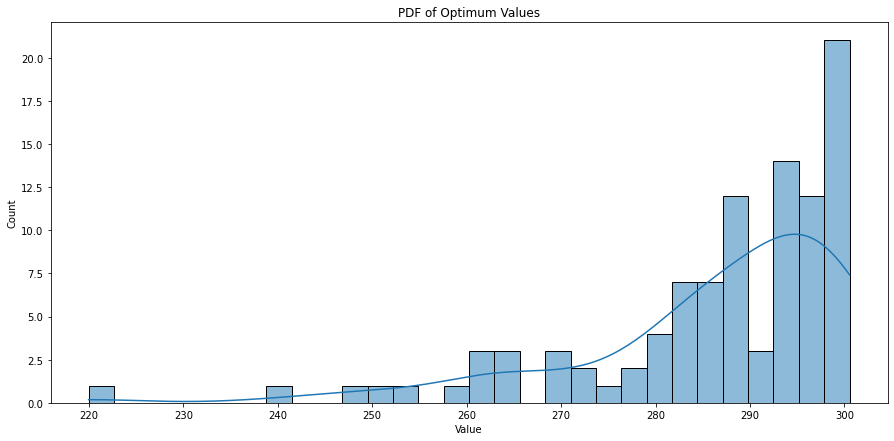

In [97]:
fig, ax = plt.subplots(figsize=(15,7))    
p = sns.histplot(z, bins = 30, kde=True, legend = True,)
ax.set_title('PDF of Optimum Values')
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()

A gaussian kernel density estimate will be fitted with the data from the MC simulation. The mean and the standard deviation of the distribution measures the perfromance of the data. The higher the mean, the better. 

In [103]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.asarray(z).reshape(-1,1))

n_samples = 10000000
samples = kde.sample(n_samples)

mean_mc = samples.mean()
variance_mc = samples.var()

In [104]:
mean_mc

286.36614571728114

In [100]:
np.sqrt(variance_mc)

14.785860154833358